# save

In [ ]:
import os
import shutil
from google.colab import drive

print("="*70)
print("GOOGLE COLAB - PERSISTENT STORAGE SETUP")
print("="*70)

# ============================================================================
# STEP 1: MOUNT GOOGLE DRIVE
# ============================================================================

print("\n📂 Mounting Google Drive...")
drive.mount('/content/drive', force_remount=False)
print("✓ Google Drive mounted successfully!")

# ============================================================================
# STEP 2: SETUP PROJECT DIRECTORY IN DRIVE
# ============================================================================

print("\n⚙️ Setting up project directory in Drive...")

# Define Drive path (akan tersimpan di Google Drive Anda)
DRIVE_PROJECT_PATH = '/content/drive/MyDrive/face_mask_project'

# Create if not exists
os.makedirs(DRIVE_PROJECT_PATH, exist_ok=True)
print(f"✓ Project directory: {DRIVE_PROJECT_PATH}")

# Create subdirectories
subdirs = [
    'data/raw',
    'data/processed',
    'data/models',
    'results',
    'notebooks'
]

for subdir in subdirs:
    full_path = os.path.join(DRIVE_PROJECT_PATH, subdir)
    os.makedirs(full_path, exist_ok=True)

print("✓ All subdirectories created")

# ============================================================================
# STEP 3: CREATE SYMLINKS (Optional - untuk kemudahan akses)
# ============================================================================

print("\n🔗 Creating symbolic links...")

# Symlink data folder
if not os.path.exists('/content/data'):
    os.symlink(f'{DRIVE_PROJECT_PATH}/data', '/content/data')
    print("✓ Linked: /content/data → Drive")

# Symlink results folder
if not os.path.exists('/content/results'):
    os.symlink(f'{DRIVE_PROJECT_PATH}/results', '/content/results')
    print("✓ Linked: /content/results → Drive")

# ============================================================================
# STEP 4: SAVE HELPER FUNCTIONS
# ============================================================================

print("\n🛠️ Setting up helper functions...")

def save_to_drive(source_path, drive_subdir=''):
    """
    Save file/folder to Google Drive

    Args:
        source_path: Path of file/folder to save
        drive_subdir: Subdirectory in Drive (e.g., 'models', 'results')

    Example:
        save_to_drive('best_model.h5', 'data/models')
    """
    dest_path = os.path.join(DRIVE_PROJECT_PATH, drive_subdir, os.path.basename(source_path))

    if os.path.isfile(source_path):
        # Save file
        os.makedirs(os.path.dirname(dest_path), exist_ok=True)
        shutil.copy2(source_path, dest_path)
        print(f"✓ Saved: {source_path} → {dest_path}")
    elif os.path.isdir(source_path):
        # Save directory
        if os.path.exists(dest_path):
            shutil.rmtree(dest_path)
        shutil.copytree(source_path, dest_path)
        print(f"✓ Saved: {source_path} → {dest_path}")
    else:
        print(f"❌ Not found: {source_path}")

    return dest_path

def load_from_drive(filename, drive_subdir=''):
    """
    Load file from Google Drive

    Args:
        filename: Name of file to load
        drive_subdir: Subdirectory in Drive

    Returns:
        Full path to file in Drive

    Example:
        model_path = load_from_drive('best_model.h5', 'data/models')
    """
    file_path = os.path.join(DRIVE_PROJECT_PATH, drive_subdir, filename)

    if os.path.exists(file_path):
        print(f"✓ Found: {file_path}")
        return file_path
    else:
        print(f"❌ Not found: {file_path}")
        return None

def check_drive_status():
    """Check what files are saved in Drive"""
    print("\n📊 Files in Google Drive:")
    print(f"   Location: {DRIVE_PROJECT_PATH}")
    print("\n")

    for root, dirs, files in os.walk(DRIVE_PROJECT_PATH):
        level = root.replace(DRIVE_PROJECT_PATH, '').count(os.sep)
        indent = ' ' * 2 * level
        folder = os.path.basename(root)
        print(f'{indent}{folder}/')

        subindent = ' ' * 2 * (level + 1)
        for file in files[:5]:  # Show first 5 files
            size = os.path.getsize(os.path.join(root, file))
            size_mb = size / (1024 * 1024)
            print(f'{subindent}{file} ({size_mb:.2f} MB)')

        if len(files) > 5:
            print(f'{subindent}... and {len(files) - 5} more files')

        # Limit depth
        if level > 2:
            break

# Make functions globally available
import builtins
builtins.save_to_drive = save_to_drive
builtins.load_from_drive = load_from_drive
builtins.check_drive_status = check_drive_status

print("✓ Helper functions loaded (save_to_drive, load_from_drive, check_drive_status)")

# ============================================================================
# STEP 5: AUTO-SAVE IMPORTANT FILES
# ============================================================================

print("\n💾 Setting up auto-save for important files...")

# List of important files to check
important_files = [
    ('data/models/best_model.h5', 'Model trained'),
    ('data/models/final_model.h5', 'Model trained'),
    ('results/training_history.csv', 'Training history'),
    ('results/model_metadata.json', 'Model metadata'),
    ('results/preprocessing_config.json', 'Config'),
    ('dataset_path.txt', 'Dataset path')
]

print("\n📋 Checking existing files:")
for filepath, description in important_files:
    local_path = f'/content/{filepath}'
    drive_path = f'{DRIVE_PROJECT_PATH}/{filepath}'

    if os.path.exists(drive_path):
        size = os.path.getsize(drive_path) / (1024 * 1024)
        print(f"   ✓ {description:20s} - {size:.2f} MB (in Drive)")
    elif os.path.exists(local_path):
        print(f"   ⚠️  {description:20s} - Found locally, not in Drive")
    else:
        print(f"   ❌ {description:20s} - Not found")

# ============================================================================
# STEP 6: QUICK START GUIDE
# ============================================================================

print("\n" + "="*70)
print("SETUP COMPLETE! ✓")
print("="*70)

print("\n📖 QUICK START GUIDE:")
print("\n1️⃣  SAVE FILES TO DRIVE:")
print("   save_to_drive('data/models/best_model.h5', 'data/models')")
print("   save_to_drive('results/training_history.png', 'results')")

print("\n2️⃣  LOAD FILES FROM DRIVE:")
print("   model_path = load_from_drive('best_model.h5', 'data/models')")
print("   model = keras.models.load_model(model_path)")

print("\n3️⃣  CHECK DRIVE STATUS:")
print("   check_drive_status()")

print("\n4️⃣  WORK DIRECTLY WITH DRIVE:")
print("   # All files in /content/data/ and /content/results/")
print("   # automatically saved to Drive via symlinks!")

print("\n💡 TIPS:")
print("   • Run this cell FIRST every time you open notebook")
print("   • Files in Drive persist forever (tidak hilang)")
print("   • Max file size: 15 GB (free Drive quota)")
print("   • Large datasets: download ulang atau simpan permanent di Drive")

print("\n⚠️  IMPORTANT:")
print("   • Kaggle dataset (~340 MB) - redownload tiap session")
print("   • Trained model (~14 MB) - save to Drive")
print("   • Results (~5 MB) - save to Drive")

# ============================================================================
# STEP 7: EXAMPLE USAGE
# ============================================================================

print("\n" + "="*70)
print("EXAMPLE USAGE")
print("\n" + "="*70)
print("🎯 You're all set! Your work will now persist in Google Drive.")
print("="*70)

# ============================================================================
# STEP 8: AUTO-CHECK AND RESTORE
# ============================================================================

print("\n🔄 Auto-checking for existing project files in Drive...")

# Check if model exists in Drive
model_path = os.path.join(DRIVE_PROJECT_PATH, 'data/models/best_model.h5')
if os.path.exists(model_path):
    size = os.path.getsize(model_path) / (1024 * 1024)
    print(f"\n✓ Found trained model in Drive! ({size:.2f} MB)")
    print(f"   Path: {model_path}")
    print("\n💡 You can load it directly:")
    print(f"   model = keras.models.load_model('{model_path}')")
else:
    print("\n⚠️  No trained model found in Drive yet")
    print("   Train your model first (Day 5-7), then it will auto-save here")

# Check results
results_path = os.path.join(DRIVE_PROJECT_PATH, 'results')
if os.path.exists(results_path):
    num_files = len([f for f in os.listdir(results_path) if os.path.isfile(os.path.join(results_path, f))])
    if num_files > 0:
        print(f"\n✓ Found {num_files} result files in Drive")
    else:
        print("\n⚠️  Results folder exists but empty")
else:
    print("\n⚠️  No results found yet")

print("\n" + "="*70)

GOOGLE COLAB - PERSISTENT STORAGE SETUP

📂 Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✓ Google Drive mounted successfully!

⚙️ Setting up project directory in Drive...
✓ Project directory: /content/drive/MyDrive/face_mask_project
✓ All subdirectories created

🔗 Creating symbolic links...

🛠️ Setting up helper functions...
✓ Helper functions loaded (save_to_drive, load_from_drive, check_drive_status)

💾 Setting up auto-save for important files...

📋 Checking existing files:
   ❌ Model trained        - Not found
   ❌ Model trained        - Not found
   ❌ Training history     - Not found
   ❌ Model metadata       - Not found
   ❌ Config               - Not found
   ❌ Dataset path         - Not found

SETUP COMPLETE! ✓

📖 QUICK START GUIDE:

1️⃣  SAVE FILES TO DRIVE:
   save_to_drive('data/models/best_model.h5', 'data/models')
   save_to_drive('results/training_history.png', 'resu

# day 1

In [ ]:
!pip install tensorflow

In [ ]:
# ============================================================================
# STEP 1: INSTALL DEPENDENCIES
# ============================================================================

print("="*70)
print("INSTALLING REQUIRED PACKAGES...")
print("="*70)

# Install Kaggle library
!pip install -q kaggle

print("✓ Kaggle package installed!")

# ============================================================================
# STEP 2: SETUP KAGGLE CREDENTIALS
# ============================================================================

print("\n" + "="*70)
print("SETTING UP KAGGLE CREDENTIALS")
print("="*70)

import os
import json

# Your Kaggle credentials
KAGGLE_USERNAME = "https://www.kaggle.com/"
KAGGLE_TOKEN = "KGAT_"

print(f"Username: {KAGGLE_USERNAME}")
print(f"Token: {KAGGLE_TOKEN[:20]}...")

# Create .kaggle directory
kaggle_dir = os.path.expanduser("~/.kaggle")
os.makedirs(kaggle_dir, exist_ok=True)

# Create kaggle.json
credentials = {
    "username": KAGGLE_USERNAME,
    "key": KAGGLE_TOKEN
}

kaggle_json_path = os.path.join(kaggle_dir, "kaggle.json")

with open(kaggle_json_path, 'w') as f:
    json.dump(credentials, f)

# Set proper permissions (important for security)
os.chmod(kaggle_json_path, 0o600)

print(f"✓ Credentials saved to: {kaggle_json_path}")

# Verify setup
!kaggle --version

# ============================================================================
# STEP 3: TEST KAGGLE API
# ============================================================================

print("\n" + "="*70)
print("TESTING KAGGLE API CONNECTION")
print("="*70)

# Test with a simple API call
!kaggle datasets list --max-size 1000 | head -5

print("\n✓ Kaggle API is working!")

# ============================================================================
# STEP 4: CREATE PROJECT STRUCTURE
# ============================================================================

print("\n" + "="*70)
print("CREATING PROJECT DIRECTORIES")
print("="*70)

import os

project_dir = "/content/drive/MyDrive/face_mask_project"
os.makedirs(project_dir, exist_ok=True)

print("Project directory:", project_dir)

# Create directories
directories = [
    f'{project_dir}/data/raw',
    f'{project_dir}/data/processed',
    f'{project_dir}/data/models',
    f'{project_dir}/results',
    f'{project_dir}/notebooks'
]

for directory in directories:
    os.makedirs(directory, exist_ok=True)
    print(f"✓ Created: {directory}/")

# ============================================================================
# STEP 5: DOWNLOAD DATASET
# ============================================================================

print("\n" + "="*70)
print("DOWNLOADING FACE MASK DETECTION DATASET")
print("="*70)

print("\n📥 Downloading dataset...")
print("   Dataset: Face Mask Detection by Omkar Gurav")
print("   Size: ~340 MB")
print("   Time: ~5-10 minutes")
print("\n   Please wait...\n")

# Download dataset
!kaggle datasets download -d omkargurav/face-mask-dataset -p data/raw

print("\n✓ Download completed!")

# ============================================================================
# STEP 6: EXTRACT DATASET
# ============================================================================

print("\n" + "="*70)
print("EXTRACTING DATASET")
print("="*70)

import zipfile

zip_path = 'data/raw/face-mask-dataset.zip'

if os.path.exists(zip_path):
    print(f"Extracting: {zip_path}")

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall('data/raw/')

    print("✓ Extraction completed!")

    # Remove zip file to save space
    os.remove(zip_path)
    print("✓ Zip file removed to save space")
else:
    print(f"❌ File not found: {zip_path}")
    print("   Please check if download was successful")

# ============================================================================
# STEP 7: VERIFY DATASET STRUCTURE
# ============================================================================

print("\n" + "="*70)
print("VERIFYING DATASET STRUCTURE")
print("="*70)

# Find the dataset directory
dataset_root = 'data/raw'

# List all subdirectories
print("\n📁 Directory structure:")
for root, dirs, files in os.walk(dataset_root):
    level = root.replace(dataset_root, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f'{indent}{os.path.basename(root)}/')

    # Only show first 3 files per directory
    subindent = ' ' * 2 * (level + 1)
    for i, file in enumerate(files[:3]):
        print(f'{subindent}{file}')
    if len(files) > 3:
        print(f'{subindent}... and {len(files) - 3} more files')

# ============================================================================
# STEP 8: COUNT IMAGES
# ============================================================================

print("\n" + "="*70)
print("COUNTING IMAGES IN DATASET")
print("="*70)

def count_images(directory):
    """Count images in directory"""
    count = 0
    for root, dirs, files in os.walk(directory):
        count += len([f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
    return count

# Adjust this path based on your dataset structure
# Common structures: 'data/raw/data/' or 'data/raw/'
possible_paths = [
    'data/raw/data',
    'data/raw',
    'data/raw/face-mask-dataset'
]

dataset_path = None
for path in possible_paths:
    if os.path.exists(path) and os.path.isdir(path):
        dataset_path = path
        break

if dataset_path:
    print(f"\n✓ Dataset found at: {dataset_path}\n")

    # Count images per split
    for split in ['train', 'validation', 'test']:
        split_path = os.path.join(dataset_path, split)
        if os.path.exists(split_path):
            print(f"{split.upper()}:")

            for category in ['with_mask', 'without_mask']:
                cat_path = os.path.join(split_path, category)
                if os.path.exists(cat_path):
                    count = count_images(cat_path)
                    print(f"  {category:15s}: {count:,} images")
            print()
else:
    print("⚠️ Dataset path not found automatically")
    print("   Please check the directory structure")
    print("\n   Run this to see structure:")
    print("   !ls -R data/raw | head -20")

# ============================================================================
# STEP 9: IMPORT LIBRARIES
# ============================================================================

print("\n" + "="*70)
print("IMPORTING LIBRARIES")
print("="*70)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
import tensorflow as tf
from tensorflow import keras

print(f"✓ NumPy version: {np.__version__}")
print(f"✓ Pandas version: {pd.__version__}")
print(f"✓ TensorFlow version: {tf.__version__}")
print(f"✓ OpenCV version: {cv2.__version__}")

# Check GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"\n🎮 GPU DETECTED: {len(gpus)} GPU(s) available!")
    for gpu in gpus:
        print(f"   - {gpu}")
else:
    print("\n⚠️  No GPU detected. Training will use CPU (slower)")
    print("   To enable GPU in Colab: Runtime → Change runtime type → GPU")

# ============================================================================
# STEP 10: FINAL SUMMARY
# ============================================================================

print("\n" + "="*70)
print("DAY 1 SETUP COMPLETED! ✓")
print("="*70)

print("\n✅ Setup Summary:")
print("   ✓ Kaggle API configured")
print("   ✓ Dataset downloaded (~12,000 images)")
print("   ✓ Dataset extracted")
print("   ✓ Project structure created")
print("   ✓ Libraries imported")
print("   ✓ Environment ready")

print("\n📊 Dataset Location:")
if dataset_path:
    print(f"   {dataset_path}")
else:
    print("   Check: data/raw/")

print("\n📁 Project Structure:")
print("   data/")
print("   ├── raw/          # Original dataset")
print("   ├── processed/    # Preprocessed data (coming soon)")
print("   └── models/       # Trained models (coming soon)")
print("   results/          # Outputs & visualizations")

print("\n🎯 Next Steps (Day 2):")
print("   1. Explore dataset with visualizations")
print("   2. Analyze image properties")
print("   3. Check data quality")
print("   4. Create exploration report")

print("\n💡 Tips:")
print("   - Save notebook progress regularly (Ctrl+S)")
print("   - Mount Google Drive to backup results")
print("   - Take screenshots for documentation")

print("\n" + "="*70)
print("Ready to proceed to Day 2! 🚀")
print("="*70)

INSTALLING REQUIRED PACKAGES...
✓ Kaggle package installed!

SETTING UP KAGGLE CREDENTIALS
Username: https://www.kaggle.com/amirulmirdas
Token: KGAT_2689f4b23eeea81...
✓ Credentials saved to: /root/.kaggle/kaggle.json
Kaggle API 1.7.4.5

TESTING KAGGLE API CONNECTION
ref                                                           title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
krishd123/pro-kabaddi-league-season-12                        Pro Kabaddi League Season 12                               871  2025-10-31 17:05:49.020000            340         28  1.0              
ayeshaimran123/customer-review-patterns-and-buying-decisions  Customer Review Patterns and Buying Decisions              844  2025-10-26 1

In [ ]:
import os

# Ensure DATASET_PATH is defined. This variable was determined in the previous cell.
# Based on the previous cell's execution, the dataset_path was found as 'data/raw/data'.
DATASET_PATH = 'data/raw/data'

# Save DATASET_PATH to a file for subsequent cells to use
# This aligns with how DATASET_PATH is loaded in later stages of the notebook.
with open('dataset_path.txt', 'w') as f:
    f.write(DATASET_PATH)

print(f"DATASET_PATH set to: {DATASET_PATH}")

# Check if dataset already contains split folders
if not os.path.exists(os.path.join(DATASET_PATH, "train")):
    print("⚠ Dataset tidak memiliki struktur train/validation/test. Membuat struktur otomatis...")

    # Buat folder baru
    os.makedirs(os.path.join(DATASET_PATH, "train/with_mask"), exist_ok=True)
    os.makedirs(os.path.join(DATASET_PATH, "train/without_mask"), exist_ok=True)
    os.makedirs(os.path.join(DATASET_PATH, "validation/with_mask"), exist_ok=True)
    os.makedirs(os.path.join(DATASET_PATH, "validation/without_mask"), exist_ok=True)
    os.makedirs(os.path.join(DATASET_PATH, "test/with_mask"), exist_ok=True)
    os.makedirs(os.path.join(DATASET_PATH, "test/without_mask"), exist_ok=True)

    # Auto-split dataset 70/20/10
    from sklearn.model_selection import train_test_split
    import shutil

    for class_name in ["with_mask", "without_mask"]:
        class_dir = os.path.join(DATASET_PATH, class_name)
        files = os.listdir(class_dir)
        files = [f for f in files if f.lower().endswith((".jpg", ".jpeg", ".png"))]

        train_files, temp_files = train_test_split(files, test_size=0.30, random_state=42)
        val_files, test_files = train_test_split(temp_files, test_size=0.33, random_state=42)

        # Copy files
        for f in train_files:
            shutil.copy(os.path.join(class_dir, f), os.path.join(DATASET_PATH, "train", class_name))

        for f in val_files:
            shutil.copy(os.path.join(class_dir, f), os.path.join(DATASET_PATH, "validation", class_name))

        for f in test_files:
            shutil.copy(os.path.join(class_dir, f), os.path.join(DATASET_PATH, "test", class_name))

    print("✓ Dataset berhasil di-split otomatis!")

DATASET_PATH set to: data/raw/data
⚠ Dataset tidak memiliki struktur train/validation/test. Membuat struktur otomatis...
✓ Dataset berhasil di-split otomatis!


FACE MASK DETECTION PROJECT - DAY 3-4
Preprocessing & Data Augmentation

SECTION 1: LOADING DATASET
✓ Dataset path loaded: data/raw/data

📁 Data directories:
   Train:      data/raw/data/train
   Validation: data/raw/data/validation
   Test:       data/raw/data/test

SECTION 2: CONFIGURATION

⚙️ Configuration:
   Image Size:    224×224 pixels
   Image Shape:   (224, 224, 3)
   Batch Size:    32
   Classes:       ['with_mask', 'without_mask']
   Num Classes:   2

SECTION 3: PREPROCESSING PIPELINE

📸 Demonstrating preprocessing on sample image...
✓ Preprocessing visualization saved to: results/preprocessing_steps.png


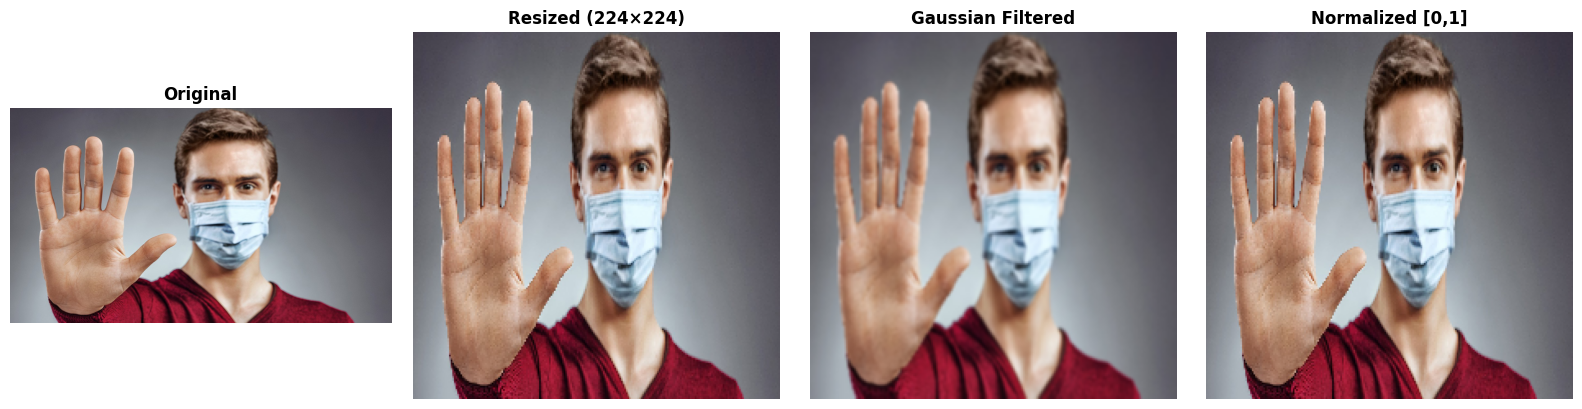


SECTION 4: DATA AUGMENTATION

🎨 Data Augmentation Techniques:
   1. Rotation: ±20 degrees
   2. Width Shift: 20%
   3. Height Shift: 20%
   4. Horizontal Flip: Yes
   5. Zoom: 10-15%
   6. Brightness: 80-120%
   7. Fill Mode: Nearest

✓ Data generators created successfully!

SECTION 5: VISUALIZING AUGMENTATION

📸 Visualizing augmentation on WITH MASK sample...


✓ Augmentation visualization saved to: results/augmentation_examples.png


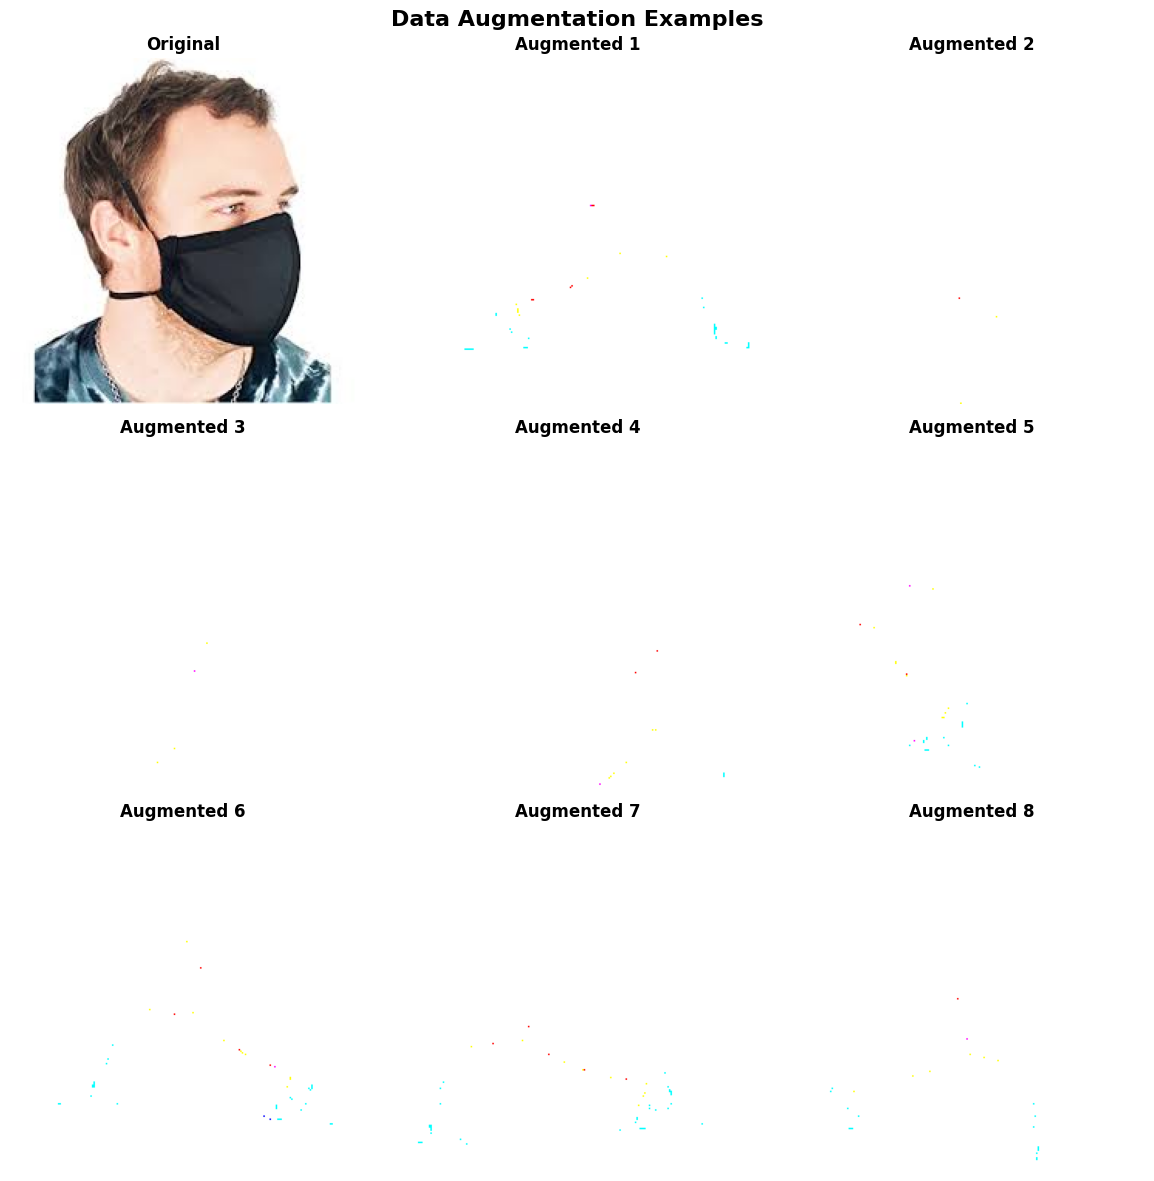


📸 Visualizing augmentation on WITHOUT MASK sample...


✓ Augmentation visualization saved to: results/augmentation_examples.png


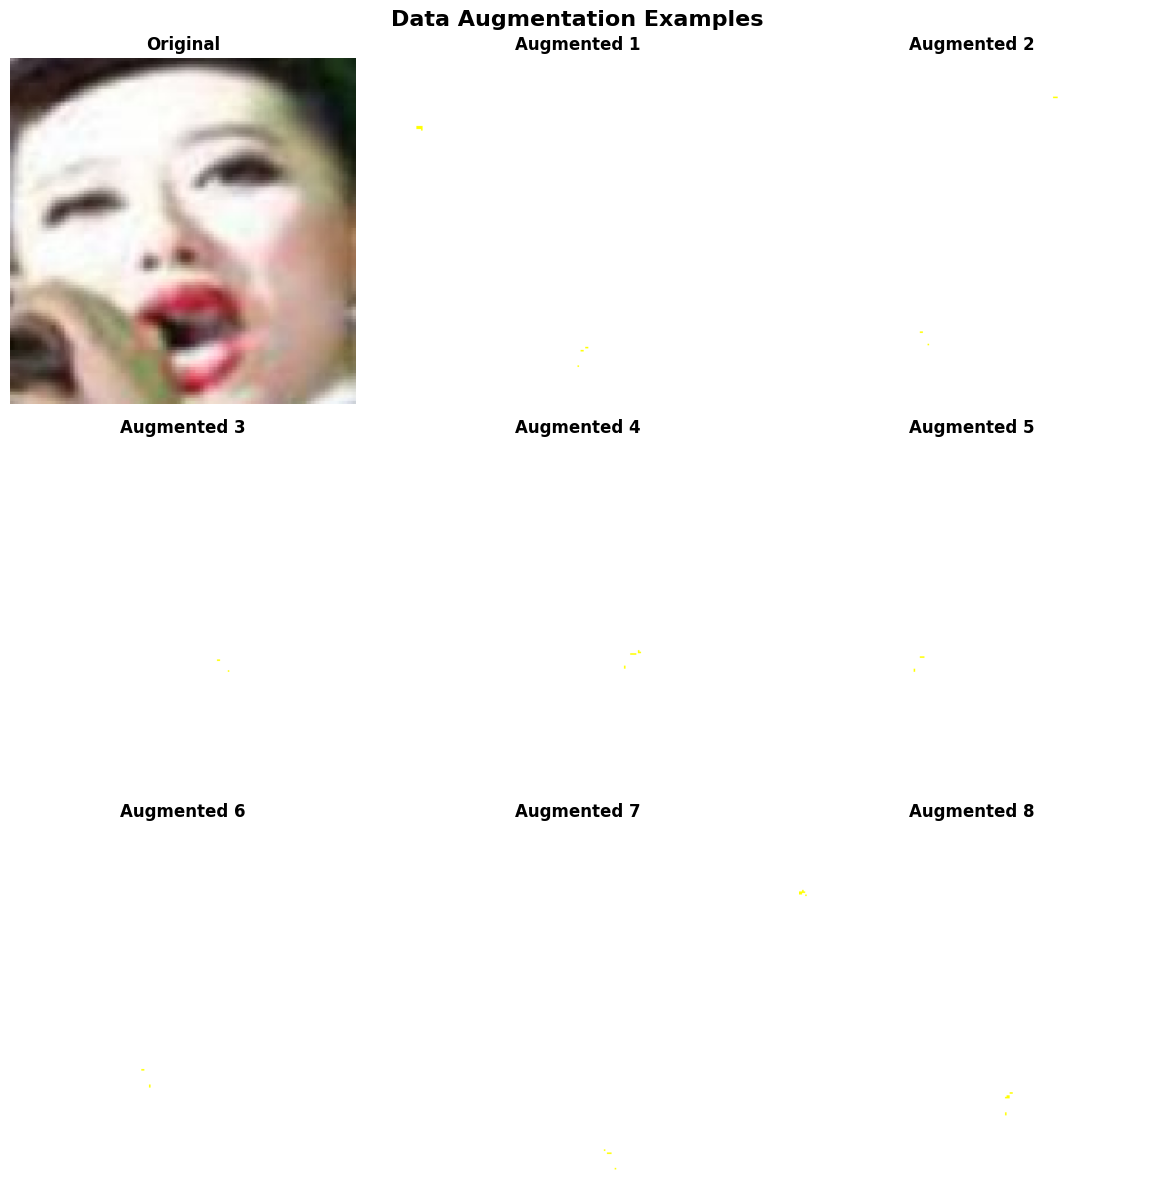


SECTION 6: CREATING DATA GENERATORS

🔄 Creating data generators from directories...
Found 5286 images belonging to 2 classes.
Found 1518 images belonging to 2 classes.
Found 749 images belonging to 2 classes.

✓ Data generators created successfully!

📊 Generator Statistics:
   Training samples:   5,286
   Validation samples: 1,518
   Test samples:       749
   Total samples:      7,553

⚙️ Generator Configuration:
   Batch size:         32
   Steps per epoch:    165
   Validation steps:   47
   Test steps:         23

🏷️ Class Indices:
   {'with_mask': 0, 'without_mask': 1}

SECTION 7: VERIFYING GENERATOR OUTPUT

🔍 Fetching one batch from training generator...

✓ Batch fetched successfully!
   Batch images shape: (32, 224, 224, 3)
   Batch labels shape: (32, 2)
   Image dtype:        float32
   Image value range:  [0.000, 1.000]

✓ Sample batch visualization saved to: results/sample_batch.png


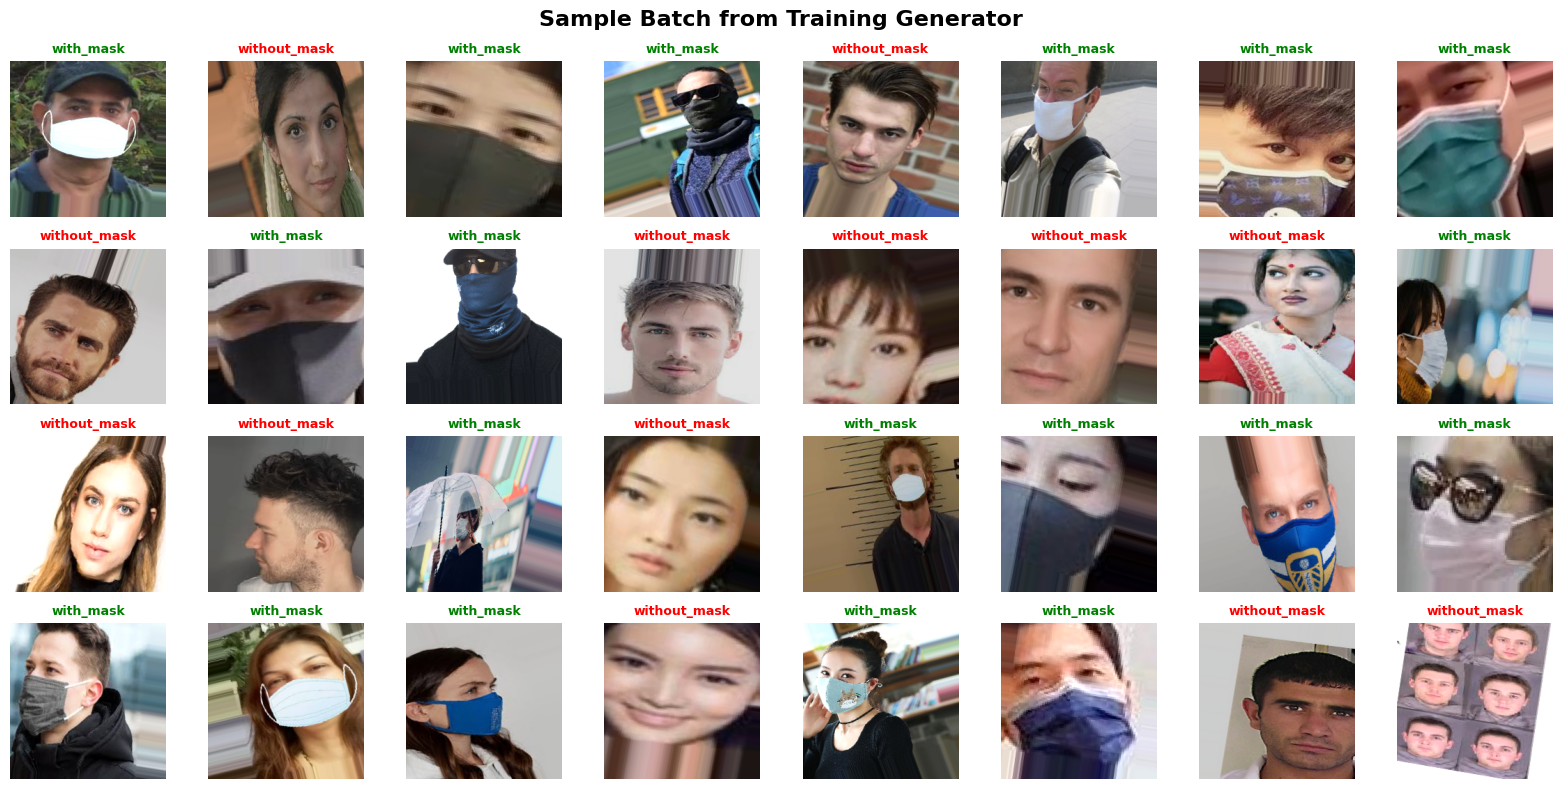


SECTION 8: CLASS DISTRIBUTION
✓ Class distribution plot saved to: results/class_distribution.png


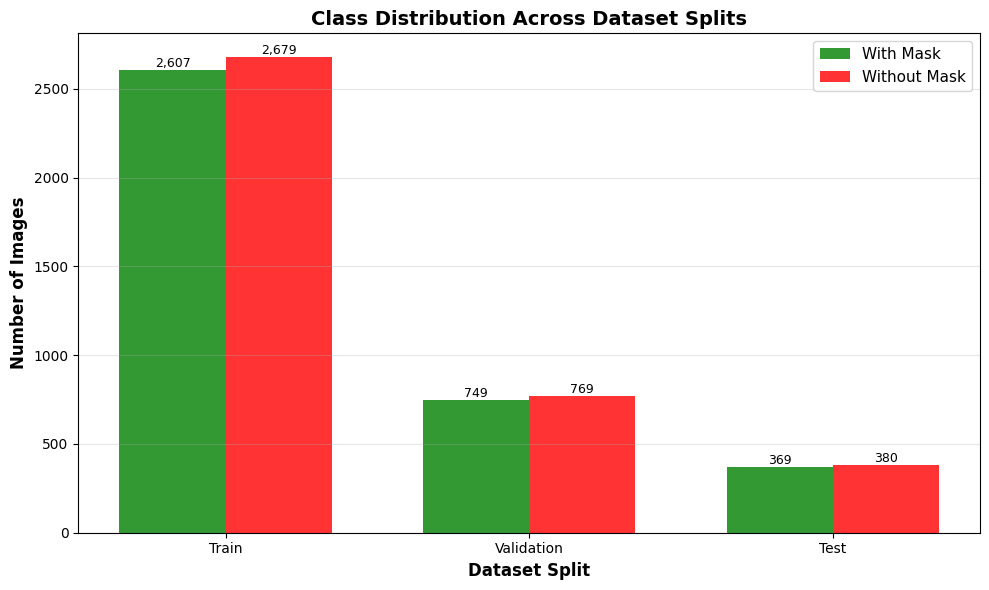


📊 Class Distribution Statistics:

Train:
   With Mask:    2,607 (49.3%)
   Without Mask: 2,679 (50.7%)
   Total:        5,286
   Balance:      ✓ Well-balanced (0.97)

Validation:
   With Mask:    749 (49.3%)
   Without Mask: 769 (50.7%)
   Total:        1,518
   Balance:      ✓ Well-balanced (0.97)

Test:
   With Mask:    369 (49.3%)
   Without Mask: 380 (50.7%)
   Total:        749
   Balance:      ✓ Well-balanced (0.97)

SECTION 9: SAVING CONFIGURATION
✓ Configuration saved to: results/preprocessing_config.json

DAY 3-4 PREPROCESSING COMPLETED! ✓

✅ Completed Tasks:
   ✓ Dataset loaded and verified
   ✓ Preprocessing pipeline implemented
   ✓ Data augmentation configured
   ✓ Train/Val/Test generators created
   ✓ Class distribution verified
   ✓ Configuration saved

📊 Generated Files:
   1. results/preprocessing_steps.png
   2. results/augmentation_examples.png (2 files)
   3. results/sample_batch.png
   4. results/class_distribution.png
   5. results/preprocessing_config.json

🎯 R

In [ ]:
"""
PROYEK UAS COMPUTER VISION
Face Mask Detection using CNN
HARI 3-4: Preprocessing & Data Augmentation

Author: [Nama Anda]
Date: [Tanggal]
"""

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("FACE MASK DETECTION PROJECT - DAY 3-4")
print("Preprocessing & Data Augmentation")
print("="*70)

# ============================================================================
# SECTION 1: LOAD DATASET PATH
# ============================================================================

print("\n" + "="*70)
print("SECTION 1: LOADING DATASET")
print("="*70)

# Load dataset path from Day 1
if os.path.exists('dataset_path.txt'):
    with open('dataset_path.txt', 'r') as f:
        DATASET_PATH = f.read().strip()
    print(f"✓ Dataset path loaded: {DATASET_PATH}")
else:
    # Try common paths
    possible_paths = ['data/raw/data', 'data/raw']
    DATASET_PATH = None

    for path in possible_paths:
        if os.path.exists(path) and os.path.exists(os.path.join(path, 'train')):
            DATASET_PATH = path
            break

    if DATASET_PATH:
        print(f"✓ Dataset found at: {DATASET_PATH}")
    else:
        print("❌ Dataset not found! Please check Day 1 setup.")
        DATASET_PATH = input("Enter dataset path manually: ")

# Define paths
TRAIN_DIR = os.path.join(DATASET_PATH, 'train')
VAL_DIR = os.path.join(DATASET_PATH, 'validation')
TEST_DIR = os.path.join(DATASET_PATH, 'test')

print(f"\n📁 Data directories:")
print(f"   Train:      {TRAIN_DIR}")
print(f"   Validation: {VAL_DIR}")
print(f"   Test:       {TEST_DIR}")

# ============================================================================
# SECTION 2: CONFIGURATION & PARAMETERS
# ============================================================================

print("\n" + "="*70)
print("SECTION 2: CONFIGURATION")
print("="*70)

# Model configuration
IMG_SIZE = 224  # MobileNetV2 standard input size
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
BATCH_SIZE = 32
CLASSES = ['with_mask', 'without_mask']
NUM_CLASSES = len(CLASSES)

print(f"\n⚙️ Configuration:")
print(f"   Image Size:    {IMG_SIZE}×{IMG_SIZE} pixels")
print(f"   Image Shape:   {IMG_SHAPE}")
print(f"   Batch Size:    {BATCH_SIZE}")
print(f"   Classes:       {CLASSES}")
print(f"   Num Classes:   {NUM_CLASSES}")

# ============================================================================
# SECTION 3: PREPROCESSING FUNCTIONS
# ============================================================================

print("\n" + "="*70)
print("SECTION 3: PREPROCESSING PIPELINE")
print("="*70)

def preprocess_image(image_path, img_size=IMG_SIZE):
    """
    Preprocess single image:
    1. Load image
    2. Resize to target size
    3. Convert to array
    4. Normalize pixel values
    """
    # Load image
    img = load_img(image_path, target_size=(img_size, img_size))

    # Convert to array
    img_array = img_to_array(img)

    # Normalize to [0, 1]
    img_array = img_array / 255.0

    return img_array

def apply_gaussian_filter(image, kernel_size=(3, 3)):
    """Apply Gaussian blur for noise reduction"""
    return cv2.GaussianBlur(image, kernel_size, 0)

def show_preprocessing_steps(image_path):
    """Visualize preprocessing steps"""
    # Original image
    original = cv2.imread(image_path)
    original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

    # Resized
    resized = cv2.resize(original, (IMG_SIZE, IMG_SIZE))

    # Gaussian filtered
    filtered = apply_gaussian_filter(resized)

    # Normalized
    normalized = resized / 255.0

    # Plot
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))

    axes[0].imshow(original)
    axes[0].set_title('Original', fontsize=12, fontweight='bold')
    axes[0].axis('off')

    axes[1].imshow(resized)
    axes[1].set_title(f'Resized ({IMG_SIZE}×{IMG_SIZE})', fontsize=12, fontweight='bold')
    axes[1].axis('off')

    axes[2].imshow(filtered)
    axes[2].set_title('Gaussian Filtered', fontsize=12, fontweight='bold')
    axes[2].axis('off')

    axes[3].imshow(normalized)
    axes[3].set_title('Normalized [0,1]', fontsize=12, fontweight='bold')
    axes[3].axis('off')

    plt.tight_layout()
    plt.savefig('results/preprocessing_steps.png', dpi=300, bbox_inches='tight')
    print("✓ Preprocessing visualization saved to: results/preprocessing_steps.png")
    plt.show()

# Demonstrate preprocessing
sample_image = os.path.join(TRAIN_DIR, 'with_mask', os.listdir(os.path.join(TRAIN_DIR, 'with_mask'))[0])
print(f"\n📸 Demonstrating preprocessing on sample image...")
show_preprocessing_steps(sample_image)

# ============================================================================
# SECTION 4: DATA AUGMENTATION
# ============================================================================

print("\n" + "="*70)
print("SECTION 4: DATA AUGMENTATION")
print("="*70)

print("\n🎨 Data Augmentation Techniques:")
print("   1. Rotation: ±20 degrees")
print("   2. Width Shift: 20%")
print("   3. Height Shift: 20%")
print("   4. Horizontal Flip: Yes")
print("   5. Zoom: 10-15%")
print("   6. Brightness: 80-120%")
print("   7. Fill Mode: Nearest")

# Create data augmentation generator for TRAINING
train_datagen = ImageDataGenerator(
    rescale=1./255,                    # Normalize to [0,1]
    rotation_range=20,                 # Random rotation ±20°
    width_shift_range=0.2,             # Horizontal shift 20%
    height_shift_range=0.2,            # Vertical shift 20%
    horizontal_flip=True,              # Random horizontal flip
    zoom_range=0.15,                   # Random zoom 10-15%
    brightness_range=[0.8, 1.2],       # Brightness variation
    fill_mode='nearest',               # Fill strategy for new pixels
    validation_split=0.0               # No split (we have separate val set)
)

# For VALIDATION and TEST: only rescaling (no augmentation)
val_test_datagen = ImageDataGenerator(
    rescale=1./255                     # Only normalize
)

print("\n✓ Data generators created successfully!")

# ============================================================================
# SECTION 5: VISUALIZE AUGMENTATION
# ============================================================================

print("\n" + "="*70)
print("SECTION 5: VISUALIZING AUGMENTATION")
print("="*70)

def visualize_augmentation(image_path, num_augmented=8):
    """Show original image and augmented versions"""

    # Load and preprocess image
    img = load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = img_to_array(img)
    img_array = img_array.reshape((1,) + img_array.shape)  # Add batch dimension

    # Create augmentation generator
    aug_gen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        zoom_range=0.15,
        brightness_range=[0.8, 1.2],
        fill_mode='nearest'
    )

    # Generate augmented images
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))
    fig.suptitle('Data Augmentation Examples', fontsize=16, fontweight='bold')

    # Show original
    axes[0, 0].imshow(img)
    axes[0, 0].set_title('Original', fontweight='bold')
    axes[0, 0].axis('off')

    # Generate and show augmented versions
    aug_iter = aug_gen.flow(img_array, batch_size=1)

    for i in range(1, 9):
        row = i // 3
        col = i % 3

        augmented = next(aug_iter)[0]
        axes[row, col].imshow(augmented)
        axes[row, col].set_title(f'Augmented {i}', fontweight='bold')
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.savefig('results/augmentation_examples.png', dpi=300, bbox_inches='tight')
    print("✓ Augmentation visualization saved to: results/augmentation_examples.png")
    plt.show()

# Visualize augmentation on both classes
print("\n📸 Visualizing augmentation on WITH MASK sample...")
sample_with_mask = os.path.join(TRAIN_DIR, 'with_mask', os.listdir(os.path.join(TRAIN_DIR, 'with_mask'))[5])
visualize_augmentation(sample_with_mask)

print("\n📸 Visualizing augmentation on WITHOUT MASK sample...")
sample_without_mask = os.path.join(TRAIN_DIR, 'without_mask', os.listdir(os.path.join(TRAIN_DIR, 'without_mask'))[5])
visualize_augmentation(sample_without_mask)

# ============================================================================
# SECTION 6: CREATE DATA GENERATORS
# ============================================================================

print("\n" + "="*70)
print("SECTION 6: CREATING DATA GENERATORS")
print("="*70)

print("\n🔄 Creating data generators from directories...")

# Training generator (with augmentation)
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=CLASSES,
    shuffle=True,
    seed=42
)

# Validation generator (no augmentation)
validation_generator = val_test_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=CLASSES,
    shuffle=False,
    seed=42
)

# Test generator (no augmentation)
test_generator = val_test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=CLASSES,
    shuffle=False,
    seed=42
)

print("\n✓ Data generators created successfully!")

print(f"\n📊 Generator Statistics:")
print(f"   Training samples:   {train_generator.samples:,}")
print(f"   Validation samples: {validation_generator.samples:,}")
print(f"   Test samples:       {test_generator.samples:,}")
print(f"   Total samples:      {train_generator.samples + validation_generator.samples + test_generator.samples:,}")

print(f"\n⚙️ Generator Configuration:")
print(f"   Batch size:         {BATCH_SIZE}")
print(f"   Steps per epoch:    {train_generator.samples // BATCH_SIZE}")
print(f"   Validation steps:   {validation_generator.samples // BATCH_SIZE}")
print(f"   Test steps:         {test_generator.samples // BATCH_SIZE}")

print(f"\n🏷️ Class Indices:")
print(f"   {train_generator.class_indices}")

# ============================================================================
# SECTION 7: VERIFY GENERATOR OUTPUT
# ============================================================================

print("\n" + "="*70)
print("SECTION 7: VERIFYING GENERATOR OUTPUT")
print("="*70)

# Get one batch
print("\n🔍 Fetching one batch from training generator...")
batch_images, batch_labels = next(train_generator)

print(f"\n✓ Batch fetched successfully!")
print(f"   Batch images shape: {batch_images.shape}")
print(f"   Batch labels shape: {batch_labels.shape}")
print(f"   Image dtype:        {batch_images.dtype}")
print(f"   Image value range:  [{batch_images.min():.3f}, {batch_images.max():.3f}]")

# Visualize batch
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
fig.suptitle('Sample Batch from Training Generator', fontsize=16, fontweight='bold')

for i in range(min(32, len(batch_images))):
    row = i // 8
    col = i % 8

    axes[row, col].imshow(batch_images[i])

    # Get label
    label_idx = np.argmax(batch_labels[i])
    label_name = CLASSES[label_idx]
    color = 'green' if label_name == 'with_mask' else 'red'

    axes[row, col].set_title(label_name, color=color, fontsize=9, fontweight='bold')
    axes[row, col].axis('off')

plt.tight_layout()
plt.savefig('results/sample_batch.png', dpi=300, bbox_inches='tight')
print("\n✓ Sample batch visualization saved to: results/sample_batch.png")
plt.show()

# ============================================================================
# SECTION 8: CLASS DISTRIBUTION CHECK
# ============================================================================

print("\n" + "="*70)
print("SECTION 8: CLASS DISTRIBUTION")
print("="*70)

def plot_class_distribution():
    """Plot class distribution across splits"""

    splits = ['Train', 'Validation', 'Test']
    with_mask_counts = []
    without_mask_counts = []

    for split_dir, split_name in zip([TRAIN_DIR, VAL_DIR, TEST_DIR], splits):
        with_mask_path = os.path.join(split_dir, 'with_mask')
        without_mask_path = os.path.join(split_dir, 'without_mask')

        with_mask_count = len([f for f in os.listdir(with_mask_path)
                               if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
        without_mask_count = len([f for f in os.listdir(without_mask_path)
                                  if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

        with_mask_counts.append(with_mask_count)
        without_mask_counts.append(without_mask_count)

    # Plot
    x = np.arange(len(splits))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 6))
    bars1 = ax.bar(x - width/2, with_mask_counts, width, label='With Mask', color='green', alpha=0.8)
    bars2 = ax.bar(x + width/2, without_mask_counts, width, label='Without Mask', color='red', alpha=0.8)

    ax.set_xlabel('Dataset Split', fontsize=12, fontweight='bold')
    ax.set_ylabel('Number of Images', fontsize=12, fontweight='bold')
    ax.set_title('Class Distribution Across Dataset Splits', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(splits)
    ax.legend(fontsize=11)
    ax.grid(axis='y', alpha=0.3)

    # Add value labels on bars
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{int(height):,}',
                   ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.savefig('results/class_distribution.png', dpi=300, bbox_inches='tight')
    print("✓ Class distribution plot saved to: results/class_distribution.png")
    plt.show()

    # Print statistics
    print("\n📊 Class Distribution Statistics:")
    for i, split in enumerate(splits):
        total = with_mask_counts[i] + without_mask_counts[i]
        with_pct = (with_mask_counts[i] / total) * 100
        without_pct = (without_mask_counts[i] / total) * 100

        print(f"\n{split}:")
        print(f"   With Mask:    {with_mask_counts[i]:,} ({with_pct:.1f}%)")
        print(f"   Without Mask: {without_mask_counts[i]:,} ({without_pct:.1f}%)")
        print(f"   Total:        {total:,}")

        # Check balance
        balance_ratio = min(with_mask_counts[i], without_mask_counts[i]) / max(with_mask_counts[i], without_mask_counts[i])
        if balance_ratio > 0.9:
            print(f"   Balance:      ✓ Well-balanced ({balance_ratio:.2f})")
        else:
            print(f"   Balance:      ⚠ Imbalanced ({balance_ratio:.2f})")

plot_class_distribution()

# ============================================================================
# SECTION 9: SAVE PREPROCESSING CONFIGURATION
# ============================================================================

print("\n" + "="*70)
print("SECTION 9: SAVING CONFIGURATION")
print("="*70)

# Save configuration
config = {
    'img_size': IMG_SIZE,
    'img_shape': IMG_SHAPE,
    'batch_size': BATCH_SIZE,
    'classes': CLASSES,
    'num_classes': NUM_CLASSES,
    'train_samples': train_generator.samples,
    'val_samples': validation_generator.samples,
    'test_samples': test_generator.samples,
    'class_indices': train_generator.class_indices,
    'augmentation': {
        'rotation_range': 20,
        'width_shift_range': 0.2,
        'height_shift_range': 0.2,
        'horizontal_flip': True,
        'zoom_range': 0.15,
        'brightness_range': [0.8, 1.2]
    }
}

# Save as JSON
import json
with open('results/preprocessing_config.json', 'w') as f:
    json.dump(config, f, indent=4)

print("✓ Configuration saved to: results/preprocessing_config.json")

# ============================================================================
# SECTION 10: SUMMARY & NEXT STEPS
# ============================================================================

print("\n" + "="*70)
print("DAY 3-4 PREPROCESSING COMPLETED! ✓")
print("="*70)

print("\n✅ Completed Tasks:")
print("   ✓ Dataset loaded and verified")
print("   ✓ Preprocessing pipeline implemented")
print("   ✓ Data augmentation configured")
print("   ✓ Train/Val/Test generators created")
print("   ✓ Class distribution verified")
print("   ✓ Configuration saved")

print("\n📊 Generated Files:")
print("   1. results/preprocessing_steps.png")
print("   2. results/augmentation_examples.png (2 files)")
print("   3. results/sample_batch.png")
print("   4. results/class_distribution.png")
print("   5. results/preprocessing_config.json")

print("\n🎯 Ready for Next Step:")
print("   ✓ Generators are ready for model training")
print("   ✓ Data is properly preprocessed and augmented")
print("   ✓ Class distribution is balanced")

print("\n📅 Tomorrow (Day 5-7):")
print("   - Build MobileNetV2 model architecture")
print("   - Implement transfer learning")
print("   - Train the model")
print("   - Monitor training progress")
print("   - Save best model")

print("\n💡 Key Takeaways:")
print("   • Input size: 224×224×3")
print("   • Normalization: [0, 1]")
print("   • Augmentation: 7 techniques")
print("   • Batch size: 32")
print(f"   • Training samples: {train_generator.samples:,}")

print("\n" + "="*70)

# 5

FACE MASK DETECTION PROJECT - DAY 5-7
Model Building & Training

SECTION 1: LOADING CONFIGURATION
✓ Configuration loaded:
   Image Size:  224×224
   Batch Size:  32
   Classes:     ['with_mask', 'without_mask']
   Num Classes: 2

✓ Dataset paths loaded

🎮 GPU Available: 1 GPU(s)
   PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')

SECTION 2: RECREATING DATA GENERATORS
Found 5286 images belonging to 2 classes.
Found 1518 images belonging to 2 classes.
Found 749 images belonging to 2 classes.
✓ Data generators created
   Training:   5,286 samples
   Validation: 1,518 samples
   Test:       749 samples

SECTION 3: BUILDING MODEL ARCHITECTURE

🏗️ Building model...
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
✓ MobileNetV2 base loaded
   Total layers: 154
   Trainable: False

✓ Model built successfully!

SECTION 4: MODEL SUMMARY


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_avg_pool                 │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_128 (Dense)               │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_0.5 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,210 (9.24 MB)

 Trainable params: 164,226 (641.51 KB)

 Non-trainable params: 2,257,984 (8.61 MB)


📊 Model Parameters:
   Total:         2,422,210
   Trainable:     164,226
   Non-trainable: 2,257,984

📐 Saving model architecture diagram...
✓ Model architecture saved to: results/model_architecture.png

SECTION 5: COMPILING MODEL
✓ Model compiled successfully

⚙️ Training Configuration:
   Optimizer:      Adam
   Learning Rate:  0.0001
   Loss Function:  Categorical Cross-Entropy
   Metrics:        Accuracy, Precision, Recall

SECTION 6: SETTING UP CALLBACKS
✓ Callbacks configured:
   1. ModelCheckpoint   - Save best model
   2. EarlyStopping     - Patience: 5 epochs
   3. ReduceLROnPlateau - Factor: 0.5, Patience: 3
   4. CSVLogger         - Log to CSV

SECTION 7: TRAINING MODEL

🎯 Training Parameters:
   Epochs:           20
   Steps per Epoch:  165
   Validation Steps: 47
   Estimated Time:   ~15-30 minutes (with GPU)

STARTING TRAINING...
Epoch 1/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 660ms/step - accuracy: 0.7714 - loss: 0.4736 - precision: 0.7714 - recall: 0.7714
Epoch 1: val_accu

165/165 ━━━━━━━━━━━━━━━━━━━━ 140s 741ms/step - accuracy: 0.7720 - loss: 0.4725 - precision: 0.7720 - recall: 0.7720 - val_accuracy: 0.9701 - val_loss: 0.0934 - val_precision: 0.9701 - val_recall: 0.9701 - learning_rate: 1.0000e-04
Epoch 2/20
  1/165 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.9688 - loss: 0.1189 - precision: 0.9688 - recall: 0.9688
Epoch 2: val_accuracy did not improve from 0.97008
165/165 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.9688 - loss: 0.1189 - precision: 0.9688 - recall: 0.9688 - val_accuracy: 0.9688 - val_loss: 0.0931 - val_precision: 0.9688 - val_recall: 0.9688 - learning_rate: 1.0000e-04
Epoch 3/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 573ms/step - accuracy: 0.9600 - loss: 0.1135 - precision: 0.9600 - recall: 0.9600
Epoch 3: val_accuracy improved from 0.97008 to 0.97739, saving model to data/models/best_model.h5


165/165 ━━━━━━━━━━━━━━━━━━━━ 102s 620ms/step - accuracy: 0.9601 - loss: 0.1134 - precision: 0.9601 - recall: 0.9601 - val_accuracy: 0.9774 - val_loss: 0.0625 - val_precision: 0.9774 - val_recall: 0.9774 - learning_rate: 1.0000e-04
Epoch 4/20
  1/165 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.8750 - loss: 0.2155 - precision: 0.8750 - recall: 0.8750
Epoch 4: val_accuracy did not improve from 0.97739
165/165 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.8750 - loss: 0.2155 - precision: 0.8750 - recall: 0.8750 - val_accuracy: 0.9774 - val_loss: 0.0621 - val_precision: 0.9774 - val_recall: 0.9774 - learning_rate: 1.0000e-04
Epoch 5/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 561ms/step - accuracy: 0.9687 - loss: 0.0889 - precision: 0.9687 - recall: 0.9687
Epoch 5: val_accuracy improved from 0.97739 to 0.98205, saving model to data/models/best_model.h5


165/165 ━━━━━━━━━━━━━━━━━━━━ 101s 611ms/step - accuracy: 0.9687 - loss: 0.0889 - precision: 0.9687 - recall: 0.9687 - val_accuracy: 0.9820 - val_loss: 0.0529 - val_precision: 0.9820 - val_recall: 0.9820 - learning_rate: 1.0000e-04
Epoch 6/20
  1/165 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 1.0000 - loss: 0.0396 - precision: 1.0000 - recall: 1.0000
Epoch 6: val_accuracy did not improve from 0.98205
165/165 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - accuracy: 1.0000 - loss: 0.0396 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.9820 - val_loss: 0.0528 - val_precision: 0.9820 - val_recall: 0.9820 - learning_rate: 1.0000e-04
Epoch 7/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 551ms/step - accuracy: 0.9749 - loss: 0.0628 - precision: 0.9749 - recall: 0.9749
Epoch 7: val_accuracy improved from 0.98205 to 0.98537, saving model to data/models/best_model.h5


165/165 ━━━━━━━━━━━━━━━━━━━━ 99s 602ms/step - accuracy: 0.9749 - loss: 0.0628 - precision: 0.9749 - recall: 0.9749 - val_accuracy: 0.9854 - val_loss: 0.0471 - val_precision: 0.9854 - val_recall: 0.9854 - learning_rate: 1.0000e-04
Epoch 8/20
  1/165 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.9375 - loss: 0.1337 - precision: 0.9375 - recall: 0.9375
Epoch 8: val_accuracy did not improve from 0.98537
165/165 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.9375 - loss: 0.1337 - precision: 0.9375 - recall: 0.9375 - val_accuracy: 0.9854 - val_loss: 0.0466 - val_precision: 0.9854 - val_recall: 0.9854 - learning_rate: 1.0000e-04
Epoch 9/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 558ms/step - accuracy: 0.9781 - loss: 0.0615 - precision: 0.9781 - recall: 0.9781
Epoch 9: val_accuracy did not improve from 0.98537
165/165 ━━━━━━━━━━━━━━━━━━━━ 100s 606ms/step - accuracy: 0.9781 - loss: 0.0615 - precision: 0.9781 - recall: 0.9781 - val_accuracy: 0.9854 - val_loss: 0.0414 - val_precision: 0.9854 - val_rec

165/165 ━━━━━━━━━━━━━━━━━━━━ 100s 606ms/step - accuracy: 0.9816 - loss: 0.0660 - precision: 0.9816 - recall: 0.9816 - val_accuracy: 0.9860 - val_loss: 0.0422 - val_precision: 0.9860 - val_recall: 0.9860 - learning_rate: 1.0000e-04
Epoch 12/20
  1/165 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.9688 - loss: 0.0671 - precision: 0.9688 - recall: 0.9688
Epoch 12: val_accuracy improved from 0.98604 to 0.98670, saving model to data/models/best_model.h5



Epoch 12: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
165/165 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.9688 - loss: 0.0671 - precision: 0.9688 - recall: 0.9688 - val_accuracy: 0.9867 - val_loss: 0.0420 - val_precision: 0.9867 - val_recall: 0.9867 - learning_rate: 1.0000e-04
Epoch 13/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 554ms/step - accuracy: 0.9869 - loss: 0.0434 - precision: 0.9869 - recall: 0.9869
Epoch 13: val_accuracy improved from 0.98670 to 0.98803, saving model to data/models/best_model.h5


165/165 ━━━━━━━━━━━━━━━━━━━━ 99s 602ms/step - accuracy: 0.9869 - loss: 0.0434 - precision: 0.9869 - recall: 0.9869 - val_accuracy: 0.9880 - val_loss: 0.0372 - val_precision: 0.9880 - val_recall: 0.9880 - learning_rate: 5.0000e-05
Epoch 14/20
  1/165 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 1.0000 - loss: 0.0143 - precision: 1.0000 - recall: 1.0000
Epoch 14: val_accuracy did not improve from 0.98803
165/165 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 1.0000 - loss: 0.0143 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.9880 - val_loss: 0.0370 - val_precision: 0.9880 - val_recall: 0.9880 - learning_rate: 5.0000e-05
Epoch 15/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 549ms/step - accuracy: 0.9776 - loss: 0.0601 - precision: 0.9776 - recall: 0.9776
Epoch 15: val_accuracy improved from 0.98803 to 0.98870, saving model to data/models/best_model.h5


165/165 ━━━━━━━━━━━━━━━━━━━━ 98s 597ms/step - accuracy: 0.9777 - loss: 0.0600 - precision: 0.9777 - recall: 0.9777 - val_accuracy: 0.9887 - val_loss: 0.0369 - val_precision: 0.9887 - val_recall: 0.9887 - learning_rate: 5.0000e-05
Epoch 16/20
  1/165 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.9688 - loss: 0.0495 - precision: 0.9688 - recall: 0.9688
Epoch 16: val_accuracy did not improve from 0.98870
165/165 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.9688 - loss: 0.0495 - precision: 0.9688 - recall: 0.9688 - val_accuracy: 0.9887 - val_loss: 0.0368 - val_precision: 0.9887 - val_recall: 0.9887 - learning_rate: 5.0000e-05
Epoch 17/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 553ms/step - accuracy: 0.9848 - loss: 0.0437 - precision: 0.9848 - recall: 0.9848
Epoch 17: val_accuracy did not improve from 0.98870
165/165 ━━━━━━━━━━━━━━━━━━━━ 99s 598ms/step - accuracy: 0.9848 - loss: 0.0437 - precision: 0.9848 - recall: 0.9848 - val_accuracy: 0.9867 - val_loss: 0.0391 - val_precision: 0.9867 - val_

165/165 ━━━━━━━━━━━━━━━━━━━━ 142s 864ms/step - accuracy: 0.9836 - loss: 0.0454 - precision: 0.9836 - recall: 0.9836 - val_accuracy: 0.9894 - val_loss: 0.0356 - val_precision: 0.9894 - val_recall: 0.9894 - learning_rate: 2.5000e-05
Epoch 20/20
  1/165 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.9688 - loss: 0.0528 - precision: 0.9688 - recall: 0.9688
Epoch 20: val_accuracy did not improve from 0.98936
165/165 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.9688 - loss: 0.0528 - precision: 0.9688 - recall: 0.9688 - val_accuracy: 0.9894 - val_loss: 0.0357 - val_precision: 0.9894 - val_recall: 0.9894 - learning_rate: 2.5000e-05
Restoring model weights from the end of the best epoch: 19.

TRAINING COMPLETED! ✓

⏱️  Training Duration: 0:19:32.414565
   Start: 14:38:15
   End:   14:57:48

SECTION 8: VISUALIZING TRAINING HISTORY
✓ Training history plot saved to: results/training_history.png


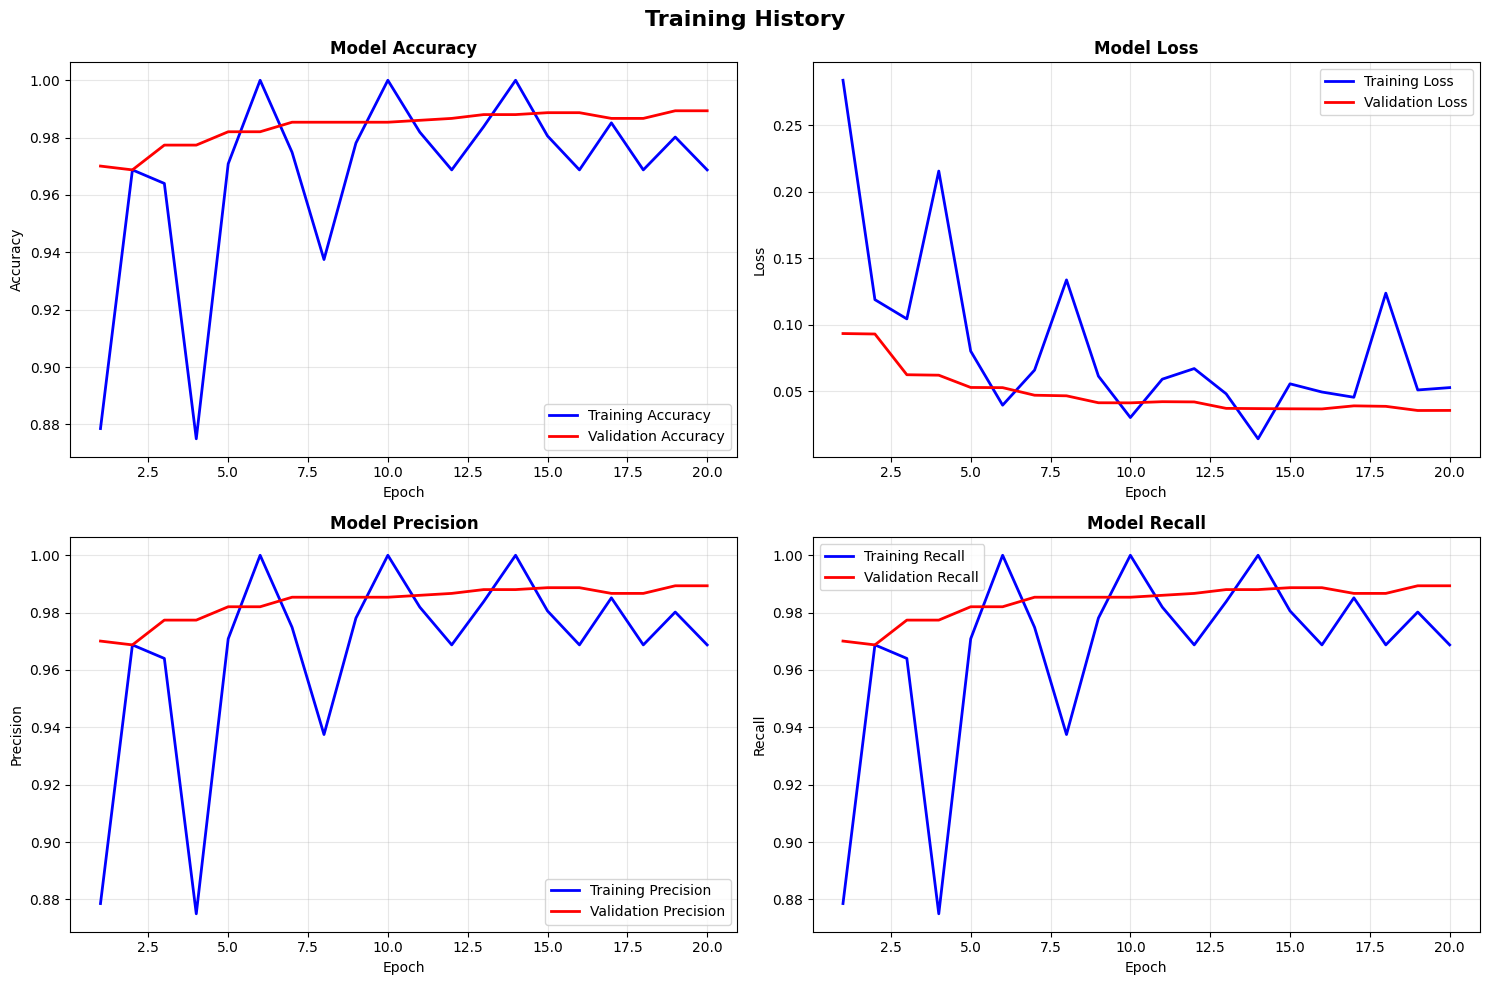


📊 Final Training Metrics:
   Training Accuracy:   0.9688
   Validation Accuracy: 0.9894
   Training Loss:       0.0528
   Validation Loss:     0.0357

✓ Model shows good generalization

SECTION 9: EVALUATING ON TEST SET

🔍 Loading best model...


✓ Best model loaded

📊 Evaluating on test set...
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - accuracy: 0.9870 - loss: 0.0306 - precision: 0.9870 - recall: 0.9870

📊 Test Set Results:
   Test Accuracy:  0.9864 (98.64%)
   Test Loss:      0.0409
   Test Precision: 0.9864
   Test Recall:    0.9864
   F1 Score:       0.9864

SECTION 10: GENERATING CONFUSION MATRIX

🔮 Generating predictions on test set...
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 634ms/step

✓ Confusion matrix saved to: results/confusion_matrix.png


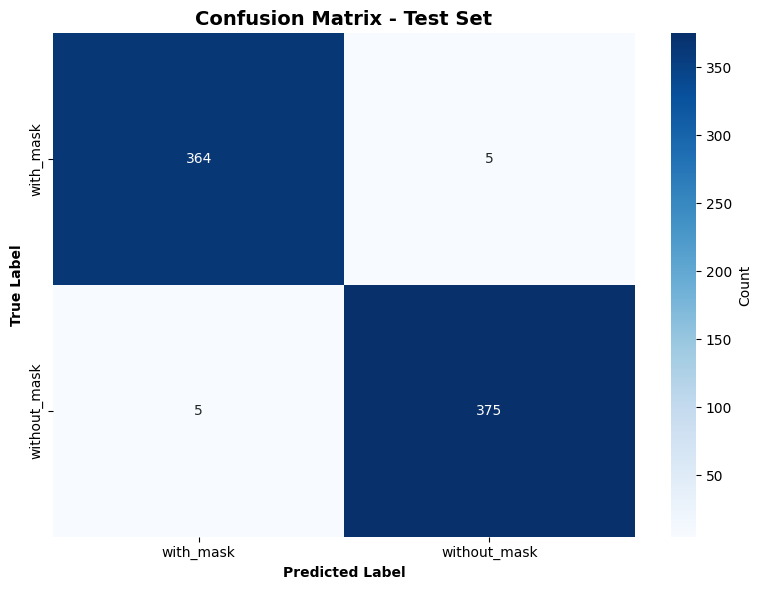


📊 Confusion Matrix:
[[364   5]
 [  5 375]]

SECTION 11: CLASSIFICATION REPORT

              precision    recall  f1-score   support

   with_mask     0.9864    0.9864    0.9864       369
without_mask     0.9868    0.9868    0.9868       380

    accuracy                         0.9866       749
   macro avg     0.9866    0.9866    0.9866       749
weighted avg     0.9866    0.9866    0.9866       749

✓ Classification report saved to: results/classification_report.txt

SECTION 12: SAVING FINAL MODEL & METADATA

💾 Saving model...
✓ Saved: data/models/final_model.h5
✓ Saved: data/models/saved_model/
✓ Saved: results/model_metadata.json

DAY 5-7 MODEL TRAINING COMPLETED! ✓

✅ Completed Tasks:
   ✓ Model architecture built (MobileNetV2)
   ✓ Transfer learning implemented
   ✓ Model trained successfully
   ✓ Best model saved
   ✓ Performance evaluated on test set
   ✓ Confusion matrix generated
   ✓ Classification report created

📊 Final Performance Summary:
   Test Accuracy:  98.64%
   T

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("FACE MASK DETECTION PROJECT - DAY 5-7")
print("Model Building & Training")
print("="*70)

# ============================================================================
# SECTION 1: LOAD CONFIGURATION
# ============================================================================

print("\n" + "="*70)
print("SECTION 1: LOADING CONFIGURATION")
print("="*70)

# Load preprocessing config
with open('results/preprocessing_config.json', 'r') as f:
    config = json.load(f)

IMG_SIZE = config['img_size']
BATCH_SIZE = config['batch_size']
CLASSES = config['classes']
NUM_CLASSES = config['num_classes']

print(f"✓ Configuration loaded:")
print(f"   Image Size:  {IMG_SIZE}×{IMG_SIZE}")
print(f"   Batch Size:  {BATCH_SIZE}")
print(f"   Classes:     {CLASSES}")
print(f"   Num Classes: {NUM_CLASSES}")

# Load dataset path
if os.path.exists('dataset_path.txt'):
    with open('dataset_path.txt', 'r') as f:
        DATASET_PATH = f.read().strip()
else:
    DATASET_PATH = 'data/raw/data'

TRAIN_DIR = os.path.join(DATASET_PATH, 'train')
VAL_DIR = os.path.join(DATASET_PATH, 'validation')
TEST_DIR = os.path.join(DATASET_PATH, 'test')

print(f"\n✓ Dataset paths loaded")

# Check GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"\n🎮 GPU Available: {len(gpus)} GPU(s)")
    for gpu in gpus:
        print(f"   {gpu}")
else:
    print("\n⚠️  No GPU. Training will be slower on CPU")

# ============================================================================
# SECTION 2: RECREATE DATA GENERATORS
# ============================================================================

print("\n" + "="*70)
print("SECTION 2: RECREATING DATA GENERATORS")
print("="*70)

# Training generator (with augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.15,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

# Validation/Test generator (no augmentation)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=CLASSES,
    shuffle=True,
    seed=42
)

validation_generator = val_test_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=CLASSES,
    shuffle=False,
    seed=42
)

test_generator = val_test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=CLASSES,
    shuffle=False,
    seed=42
)

print(f"✓ Data generators created")
print(f"   Training:   {train_generator.samples:,} samples")
print(f"   Validation: {validation_generator.samples:,} samples")
print(f"   Test:       {test_generator.samples:,} samples")

# ============================================================================
# SECTION 3: BUILD MODEL ARCHITECTURE
# ============================================================================

print("\n" + "="*70)
print("SECTION 3: BUILDING MODEL ARCHITECTURE")
print("="*70)

def build_model(img_size=224, num_classes=2):
    """
    Build MobileNetV2 model with transfer learning

    Architecture:
    - Base: MobileNetV2 (pre-trained on ImageNet)
    - Global Average Pooling
    - Dense Layer (128 units)
    - Dropout (0.5)
    - Output Layer (num_classes)
    """

    # Load pre-trained MobileNetV2 (without top layers)
    base_model = MobileNetV2(
        input_shape=(img_size, img_size, 3),
        include_top=False,  # Remove classification layers
        weights='imagenet'  # Use ImageNet pre-trained weights
    )

    # Freeze base model layers (transfer learning)
    base_model.trainable = False

    print(f"✓ MobileNetV2 base loaded")
    print(f"   Total layers: {len(base_model.layers)}")
    print(f"   Trainable: {base_model.trainable}")

    # Build custom top layers
    model = models.Sequential([
        base_model,

        # Global Average Pooling
        layers.GlobalAveragePooling2D(name='global_avg_pool'),

        # Dense layer with regularization
        layers.Dense(128, activation='relu', name='dense_128'),
        layers.Dropout(0.5, name='dropout_0.5'),

        # Output layer
        layers.Dense(num_classes, activation='softmax', name='output')
    ])

    return model

# Build model
print("\n🏗️ Building model...")
model = build_model(img_size=IMG_SIZE, num_classes=NUM_CLASSES)

print("\n✓ Model built successfully!")

# ============================================================================
# SECTION 4: MODEL SUMMARY
# ============================================================================

print("\n" + "="*70)
print("SECTION 4: MODEL SUMMARY")
print("="*70)

model.summary()

# Count parameters
total_params = model.count_params()
trainable_params = sum([tf.size(w).numpy() for w in model.trainable_weights])
non_trainable_params = total_params - trainable_params

print(f"\n📊 Model Parameters:")
print(f"   Total:         {total_params:,}")
print(f"   Trainable:     {trainable_params:,}")
print(f"   Non-trainable: {non_trainable_params:,}")

# Visualize model architecture
print("\n📐 Saving model architecture diagram...")
tf.keras.utils.plot_model(
    model,
    to_file='results/model_architecture.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',  # Top to Bottom
    dpi=150
)
print("✓ Model architecture saved to: results/model_architecture.png")

# ============================================================================
# SECTION 5: COMPILE MODEL
# ============================================================================

print("\n" + "="*70)
print("SECTION 5: COMPILING MODEL")
print("="*70)

# Define optimizer
optimizer = keras.optimizers.Adam(learning_rate=0.0001)

# Compile model
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy',
             keras.metrics.Precision(name='precision'),
             keras.metrics.Recall(name='recall')]
)

print("✓ Model compiled successfully")
print(f"\n⚙️ Training Configuration:")
print(f"   Optimizer:      Adam")
print(f"   Learning Rate:  0.0001")
print(f"   Loss Function:  Categorical Cross-Entropy")
print(f"   Metrics:        Accuracy, Precision, Recall")

# ============================================================================
# SECTION 6: SETUP CALLBACKS
# ============================================================================

print("\n" + "="*70)
print("SECTION 6: SETTING UP CALLBACKS")
print("="*70)

# Create models directory
os.makedirs('data/models', exist_ok=True)

# 1. Model Checkpoint - Save best model
checkpoint = ModelCheckpoint(
    filepath='data/models/best_model.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

# 2. Early Stopping - Stop if no improvement
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# 3. Reduce Learning Rate - Reduce LR when plateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-7,
    verbose=1
)

# 4. CSV Logger - Log training history
csv_logger = CSVLogger(
    'results/training_history.csv',
    append=False
)

callbacks = [checkpoint, early_stop, reduce_lr, csv_logger]

print("✓ Callbacks configured:")
print("   1. ModelCheckpoint   - Save best model")
print("   2. EarlyStopping     - Patience: 5 epochs")
print("   3. ReduceLROnPlateau - Factor: 0.5, Patience: 3")
print("   4. CSVLogger         - Log to CSV")

# ============================================================================
# SECTION 7: TRAIN MODEL
# ============================================================================

print("\n" + "="*70)
print("SECTION 7: TRAINING MODEL")
print("="*70)

# Training parameters
EPOCHS = 20
STEPS_PER_EPOCH = train_generator.samples // BATCH_SIZE
VALIDATION_STEPS = validation_generator.samples // BATCH_SIZE

print(f"\n🎯 Training Parameters:")
print(f"   Epochs:           {EPOCHS}")
print(f"   Steps per Epoch:  {STEPS_PER_EPOCH}")
print(f"   Validation Steps: {VALIDATION_STEPS}")
print(f"   Estimated Time:   ~15-30 minutes (with GPU)")

print("\n" + "="*70)
print("STARTING TRAINING...")
print("="*70)

# Start training
start_time = datetime.now()

history = model.fit(
    train_generator,
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=VALIDATION_STEPS,
    callbacks=callbacks,
    verbose=1
)

end_time = datetime.now()
training_duration = end_time - start_time

print("\n" + "="*70)
print("TRAINING COMPLETED! ✓")
print("="*70)

print(f"\n⏱️  Training Duration: {training_duration}")
print(f"   Start: {start_time.strftime('%H:%M:%S')}")
print(f"   End:   {end_time.strftime('%H:%M:%S')}")

# ============================================================================
# SECTION 8: VISUALIZE TRAINING HISTORY
# ============================================================================

print("\n" + "="*70)
print("SECTION 8: VISUALIZING TRAINING HISTORY")
print("="*70)

def plot_training_history(history):
    """Plot training & validation metrics"""

    # Get history data
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(1, len(acc) + 1)

    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Training History', fontsize=16, fontweight='bold')

    # Plot 1: Accuracy
    axes[0, 0].plot(epochs_range, acc, 'b-', label='Training Accuracy', linewidth=2)
    axes[0, 0].plot(epochs_range, val_acc, 'r-', label='Validation Accuracy', linewidth=2)
    axes[0, 0].set_title('Model Accuracy', fontweight='bold')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Plot 2: Loss
    axes[0, 1].plot(epochs_range, loss, 'b-', label='Training Loss', linewidth=2)
    axes[0, 1].plot(epochs_range, val_loss, 'r-', label='Validation Loss', linewidth=2)
    axes[0, 1].set_title('Model Loss', fontweight='bold')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # Plot 3: Precision
    if 'precision' in history.history:
        prec = history.history['precision']
        val_prec = history.history['val_precision']
        axes[1, 0].plot(epochs_range, prec, 'b-', label='Training Precision', linewidth=2)
        axes[1, 0].plot(epochs_range, val_prec, 'r-', label='Validation Precision', linewidth=2)
        axes[1, 0].set_title('Model Precision', fontweight='bold')
        axes[1, 0].set_xlabel('Epoch')
        axes[1, 0].set_ylabel('Precision')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)

    # Plot 4: Recall
    if 'recall' in history.history:
        rec = history.history['recall']
        val_rec = history.history['val_recall']
        axes[1, 1].plot(epochs_range, rec, 'b-', label='Training Recall', linewidth=2)
        axes[1, 1].plot(epochs_range, val_rec, 'r-', label='Validation Recall', linewidth=2)
        axes[1, 1].set_title('Model Recall', fontweight='bold')
        axes[1, 1].set_xlabel('Epoch')
        axes[1, 1].set_ylabel('Recall')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('results/training_history.png', dpi=300, bbox_inches='tight')
    print("✓ Training history plot saved to: results/training_history.png")
    plt.show()

plot_training_history(history)

# Print final metrics
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"\n📊 Final Training Metrics:")
print(f"   Training Accuracy:   {final_train_acc:.4f}")
print(f"   Validation Accuracy: {final_val_acc:.4f}")
print(f"   Training Loss:       {final_train_loss:.4f}")
print(f"   Validation Loss:     {final_val_loss:.4f}")

# Check for overfitting
if final_train_acc - final_val_acc > 0.1:
    print("\n⚠️  Warning: Possible overfitting detected")
    print("   (Training accuracy >> Validation accuracy)")
else:
    print("\n✓ Model shows good generalization")

# ============================================================================
# SECTION 9: EVALUATE ON TEST SET
# ============================================================================

print("\n" + "="*70)
print("SECTION 9: EVALUATING ON TEST SET")
print("="*70)

print("\n🔍 Loading best model...")
best_model = keras.models.load_model('data/models/best_model.h5')

print("✓ Best model loaded")
print("\n📊 Evaluating on test set...")

# Evaluate
test_loss, test_acc, test_prec, test_rec = best_model.evaluate(
    test_generator,
    steps=test_generator.samples // BATCH_SIZE,
    verbose=1
)

print(f"\n📊 Test Set Results:")
print(f"   Test Accuracy:  {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"   Test Loss:      {test_loss:.4f}")
print(f"   Test Precision: {test_prec:.4f}")
print(f"   Test Recall:    {test_rec:.4f}")

# Calculate F1 Score
f1_score = 2 * (test_prec * test_rec) / (test_prec + test_rec)
print(f"   F1 Score:       {f1_score:.4f}")

# ============================================================================
# SECTION 10: CONFUSION MATRIX
# ============================================================================

print("\n" + "="*70)
print("SECTION 10: GENERATING CONFUSION MATRIX")
print("="*70)

# Get predictions
print("\n🔮 Generating predictions on test set...")
test_generator.reset()
predictions = best_model.predict(
    test_generator,
    steps=test_generator.samples // BATCH_SIZE + 1,
    verbose=1
)

# Get true labels
true_labels = test_generator.classes[:len(predictions)]
predicted_labels = np.argmax(predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=CLASSES, yticklabels=CLASSES,
            cbar_kws={'label': 'Count'})
ax.set_xlabel('Predicted Label', fontweight='bold')
ax.set_ylabel('True Label', fontweight='bold')
ax.set_title('Confusion Matrix - Test Set', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('results/confusion_matrix.png', dpi=300, bbox_inches='tight')
print("\n✓ Confusion matrix saved to: results/confusion_matrix.png")
plt.show()

print("\n📊 Confusion Matrix:")
print(cm)

# ============================================================================
# SECTION 11: CLASSIFICATION REPORT
# ============================================================================

print("\n" + "="*70)
print("SECTION 11: CLASSIFICATION REPORT")
print("="*70)

# Generate classification report
report = classification_report(
    true_labels,
    predicted_labels,
    target_names=CLASSES,
    digits=4
)

print("\n" + report)

# Save report
with open('results/classification_report.txt', 'w') as f:
    f.write("CLASSIFICATION REPORT - TEST SET\n")
    f.write("="*70 + "\n\n")
    f.write(report)
    f.write("\n" + "="*70 + "\n")
    f.write(f"\nTest Accuracy:  {test_acc:.4f}\n")
    f.write(f"Test Precision: {test_prec:.4f}\n")
    f.write(f"Test Recall:    {test_rec:.4f}\n")
    f.write(f"F1 Score:       {f1_score:.4f}\n")

print("✓ Classification report saved to: results/classification_report.txt")

# ============================================================================
# SECTION 12: SAVE FINAL MODEL & METADATA
# ============================================================================

print("\n" + "="*70)
print("SECTION 12: SAVING FINAL MODEL & METADATA")
print("="*70)

# Save model in different formats
print("\n💾 Saving model...")

# 1. Keras H5 format
model.save('data/models/final_model.h5')
print("✓ Saved: data/models/final_model.h5")

# 2. SavedModel format (for deployment)
model.save('data/models/saved_model.keras')
print("✓ Saved: data/models/saved_model/")

# Save training metadata
metadata = {
    'training_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'training_duration': str(training_duration),
    'architecture': 'MobileNetV2',
    'img_size': IMG_SIZE,
    'batch_size': BATCH_SIZE,
    'epochs_trained': len(history.history['accuracy']),
    'final_metrics': {
        'train_accuracy': float(final_train_acc),
        'val_accuracy': float(final_val_acc),
        'test_accuracy': float(test_acc),
        'test_precision': float(test_prec),
        'test_recall': float(test_rec),
        'f1_score': float(f1_score)
    },
    'class_indices': train_generator.class_indices
}

with open('results/model_metadata.json', 'w') as f:
    json.dump(metadata, f, indent=4)

print("✓ Saved: results/model_metadata.json")

# ============================================================================
# SECTION 13: FINAL SUMMARY
# ============================================================================

print("\n" + "="*70)
print("DAY 5-7 MODEL TRAINING COMPLETED! ✓")
print("="*70)

print("\n✅ Completed Tasks:")
print("   ✓ Model architecture built (MobileNetV2)")
print("   ✓ Transfer learning implemented")
print("   ✓ Model trained successfully")
print("   ✓ Best model saved")
print("   ✓ Performance evaluated on test set")
print("   ✓ Confusion matrix generated")
print("   ✓ Classification report created")

print("\n📊 Final Performance Summary:")
print(f"   Test Accuracy:  {test_acc*100:.2f}%")
print(f"   Test Precision: {test_prec*100:.2f}%")
print(f"   Test Recall:    {test_rec*100:.2f}%")
print(f"   F1 Score:       {f1_score*100:.2f}%")

print("\n📁 Generated Files:")
print("   1. data/models/best_model.h5")
print("   2. data/models/final_model.h5")
print("   3. data/models/saved_model/")
print("   4. results/model_architecture.png")
print("   5. results/training_history.png")
print("   6. results/training_history.csv")
print("   7. results/confusion_matrix.png")
print("   8. results/classification_report.txt")
print("   9. results/model_metadata.json")

print("\n🎯 Model is Ready for Deployment!")

print("\n📅 Next Steps (Day 8-14):")
print("   - Implement real-time face detection")
print("   - Integrate mask classification")
print("   - Build user interface")
print("   - Test on webcam/video")
print("   - Create final demo")

print("\n" + "="*70)

# 8-11

FACE MASK DETECTION PROJECT - DAY 8-11
Real-Time Detection System

SECTION 1: LOADING TRAINED MODEL

📦 Loading model from: data/models/best_model.h5


✓ Model loaded successfully!

⚙️ Model Configuration:
   Image Size: 224×224
   Classes:    ['with_mask', 'without_mask']
   Accuracy:   98.64%

SECTION 2: SETTING UP FACE DETECTION

🔍 Loading face detectors...
✓ Haar Cascade loaded
⚠️  MTCNN not installed. Install with: pip install mtcnn

✓ Using Haar Cascade (faster)

SECTION 3: IMPLEMENTING DETECTION FUNCTIONS
✓ Face detection functions implemented

SECTION 4: IMPLEMENTING MASK CLASSIFICATION
✓ Mask classification function implemented

SECTION 5: IMPLEMENTING VISUALIZATION
✓ Visualization functions implemented

SECTION 6: TESTING ON SAMPLE IMAGES

🖼️  Testing on sample images...
✓ Saved result to: results/sample_detections/with_mask_1.jpg
✓ Saved result to: results/sample_detections/with_mask_2.jpg
✓ Saved result to: results/sample_detections/with_mask_3.jpg
✓ Saved result to: results/sample_detections/without_mask_1.jpg
✓ Saved result to: results/sample_detections/without_mask_2.jpg
✓ Saved result to: results/sample_detections/with

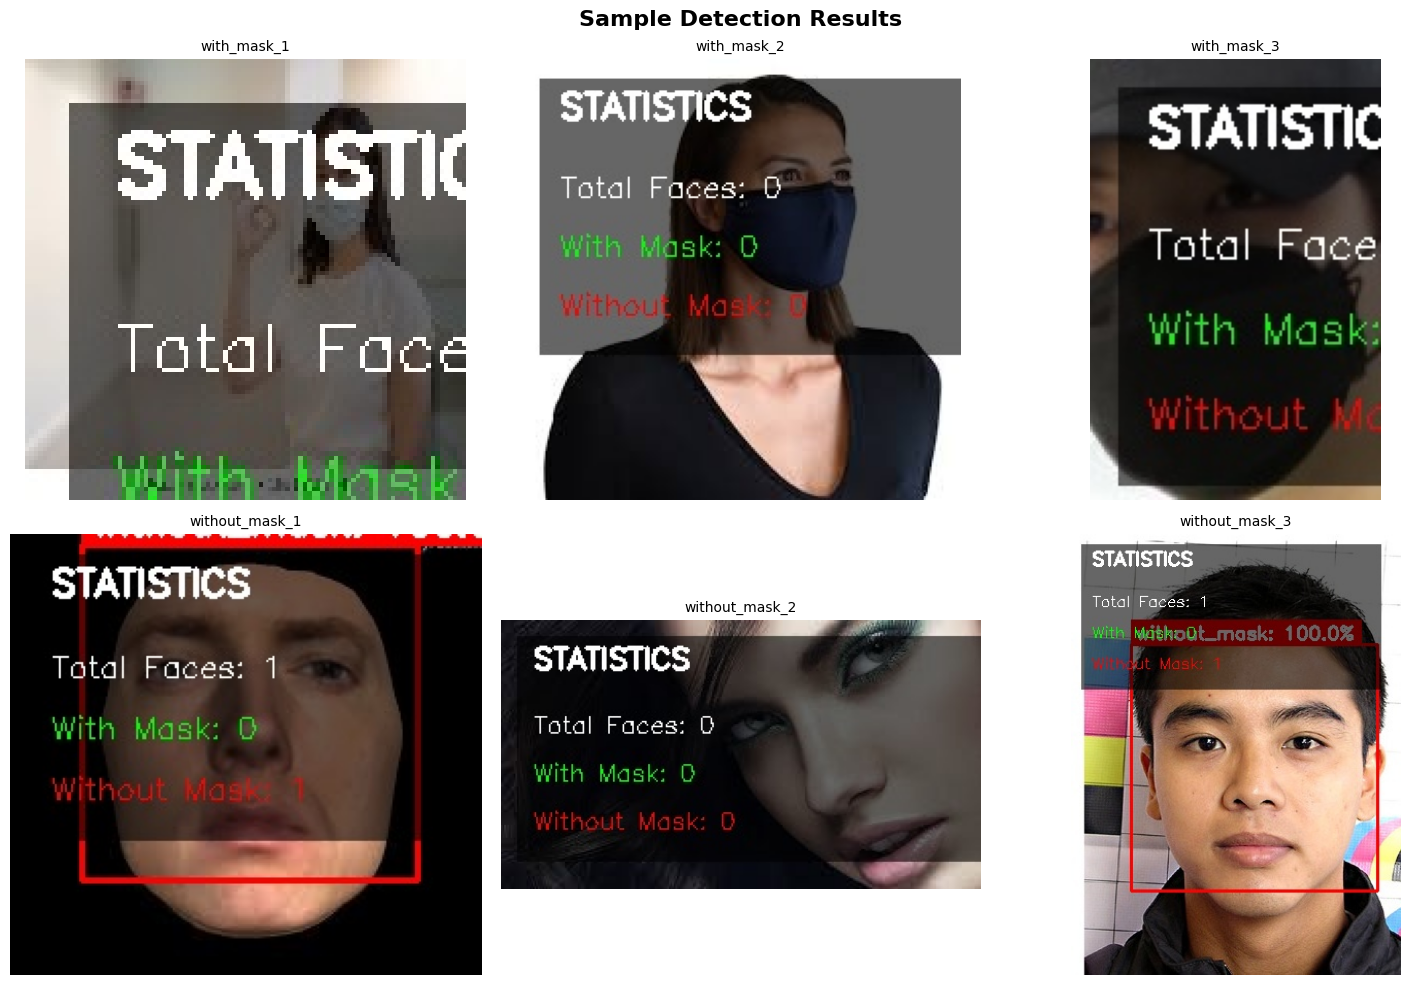


DAY 8-11 REAL-TIME DETECTION COMPLETED! ✓

✅ Completed Tasks:
   ✓ Face detection implemented (Haar Cascade / MTCNN)
   ✓ Mask classification integrated
   ✓ Image processing function created
   ✓ Video processing function created
   ✓ Webcam detection code prepared
   ✓ Sample detections generated
   ✓ Visualization created

📁 Generated Files:
   1. results/sample_detections/ (6 images)
   2. results/webcam_detection.py
   3. results/detection_results.png

🎯 System Ready!
   ✓ Can process images
   ✓ Can process videos
   ✓ Can run on webcam (locally)

📅 Next Steps (Day 12-14):
   - Build GUI/Web interface
   - Add advanced features
   - Create demo video
   - Prepare final presentation
   - Write documentation

💡 To Run Webcam Detection:
   1. Download: results/webcam_detection.py
   2. Download: data/models/best_model.h5
   3. Run locally: python webcam_detection.py



In [ ]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from datetime import datetime
import json
from collections import deque
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("FACE MASK DETECTION PROJECT - DAY 8-11")
print("Real-Time Detection System")
print("="*70)

# ============================================================================
# SECTION 1: LOAD TRAINED MODEL
# ============================================================================

print("\n" + "="*70)
print("SECTION 1: LOADING TRAINED MODEL")
print("="*70)

# Load best model
MODEL_PATH = 'data/models/best_model.h5'

if os.path.exists(MODEL_PATH):
    print(f"\n📦 Loading model from: {MODEL_PATH}")
    model = keras.models.load_model(MODEL_PATH)
    print("✓ Model loaded successfully!")
else:
    print(f"❌ Model not found at: {MODEL_PATH}")
    print("   Please run Day 5-7 training first!")
    raise FileNotFoundError("Model file not found")

# Load configuration
with open('results/model_metadata.json', 'r') as f:
    metadata = json.load(f)

IMG_SIZE = metadata['img_size']
CLASS_INDICES = metadata['class_indices']
CLASSES = list(CLASS_INDICES.keys())

print(f"\n⚙️ Model Configuration:")
print(f"   Image Size: {IMG_SIZE}×{IMG_SIZE}")
print(f"   Classes:    {CLASSES}")
print(f"   Accuracy:   {metadata['final_metrics']['test_accuracy']*100:.2f}%")

# ============================================================================
# SECTION 2: FACE DETECTION SETUP
# ============================================================================

print("\n" + "="*70)
print("SECTION 2: SETTING UP FACE DETECTION")
print("="*70)

# Method 1: Haar Cascade (Faster, good for CPU)
def load_haar_cascade():
    """Load Haar Cascade face detector"""
    cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
    face_cascade = cv2.CascadeClassifier(cascade_path)

    if face_cascade.empty():
        print("❌ Failed to load Haar Cascade")
        return None

    print("✓ Haar Cascade loaded")
    return face_cascade

# Method 2: MTCNN (More accurate, slower)
def load_mtcnn():
    """Load MTCNN face detector"""
    try:
        from mtcnn import MTCNN
        detector = MTCNN()
        print("✓ MTCNN loaded")
        return detector
    except ImportError:
        print("⚠️  MTCNN not installed. Install with: pip install mtcnn")
        return None

# Try to load both
print("\n🔍 Loading face detectors...")

haar_cascade = load_haar_cascade()
mtcnn_detector = load_mtcnn()

# Choose default detector
if mtcnn_detector is not None:
    DETECTOR_TYPE = 'mtcnn'
    print("\n✓ Using MTCNN (more accurate)")
elif haar_cascade is not None:
    DETECTOR_TYPE = 'haar'
    print("\n✓ Using Haar Cascade (faster)")
else:
    raise Exception("No face detector available!")

# ============================================================================
# SECTION 3: FACE DETECTION FUNCTIONS
# ============================================================================

print("\n" + "="*70)
print("SECTION 3: IMPLEMENTING DETECTION FUNCTIONS")
print("="*70)

def detect_faces_haar(image, scaleFactor=1.1, minNeighbors=5):
    """
    Detect faces using Haar Cascade

    Args:
        image: Input image (BGR)
        scaleFactor: How much image size is reduced at each scale
        minNeighbors: How many neighbors each rectangle should have

    Returns:
        List of (x, y, w, h) tuples
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = haar_cascade.detectMultiScale(
        gray,
        scaleFactor=scaleFactor,
        minNeighbors=minNeighbors,
        minSize=(30, 30)
    )
    return faces

def detect_faces_mtcnn(image, confidence_threshold=0.9):
    """
    Detect faces using MTCNN

    Args:
        image: Input image (RGB)
        confidence_threshold: Minimum confidence for detection

    Returns:
        List of (x, y, w, h) tuples
    """
    # MTCNN expects RGB
    if len(image.shape) == 3 and image.shape[2] == 3:
        rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
        rgb_image = image

    detections = mtcnn_detector.detect_faces(rgb_image)

    faces = []
    for detection in detections:
        if detection['confidence'] >= confidence_threshold:
            x, y, w, h = detection['box']
            # Ensure positive dimensions
            x, y = max(0, x), max(0, y)
            faces.append((x, y, w, h))

    return faces

def detect_faces(image, method='auto'):
    """
    Detect faces using specified method

    Args:
        image: Input image
        method: 'haar', 'mtcnn', or 'auto'

    Returns:
        List of face bounding boxes
    """
    if method == 'auto':
        method = DETECTOR_TYPE

    if method == 'mtcnn' and mtcnn_detector is not None:
        return detect_faces_mtcnn(image)
    elif method == 'haar' and haar_cascade is not None:
        return detect_faces_haar(image)
    else:
        return []

print("✓ Face detection functions implemented")

# ============================================================================
# SECTION 4: MASK CLASSIFICATION FUNCTION
# ============================================================================

print("\n" + "="*70)
print("SECTION 4: IMPLEMENTING MASK CLASSIFICATION")
print("="*70)

def classify_mask(face_img, model, img_size=224):
    """
    Classify if face has mask or not

    Args:
        face_img: Face image (BGR)
        model: Trained Keras model
        img_size: Input size for model

    Returns:
        (label, confidence) tuple
    """
    # Preprocess face image
    face_resized = cv2.resize(face_img, (img_size, img_size))
    face_rgb = cv2.cvtColor(face_resized, cv2.COLOR_BGR2RGB)
    face_normalized = face_rgb / 255.0
    face_batch = np.expand_dims(face_normalized, axis=0)

    # Predict
    predictions = model.predict(face_batch, verbose=0)[0]

    # Get label and confidence
    class_idx = np.argmax(predictions)
    confidence = predictions[class_idx]
    label = CLASSES[class_idx]

    return label, confidence

print("✓ Mask classification function implemented")

# ============================================================================
# SECTION 5: VISUALIZATION FUNCTIONS
# ============================================================================

print("\n" + "="*70)
print("SECTION 5: IMPLEMENTING VISUALIZATION")
print("="*70)

def draw_detection(image, x, y, w, h, label, confidence, thickness=2):
    """
    Draw bounding box and label on image

    Args:
        image: Input image
        x, y, w, h: Bounding box coordinates
        label: Classification label
        confidence: Confidence score
        thickness: Box line thickness

    Returns:
        Image with annotations
    """
    # Choose color based on label
    if label == 'with_mask':
        color = (0, 255, 0)  # Green
        text_color = (0, 255, 0)
    else:
        color = (0, 0, 255)  # Red
        text_color = (0, 0, 255)

    # Draw rectangle
    cv2.rectangle(image, (x, y), (x+w, y+h), color, thickness)

    # Prepare label text
    text = f"{label}: {confidence*100:.1f}%"

    # Get text size for background
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.6
    (text_width, text_height), baseline = cv2.getTextSize(
        text, font, font_scale, thickness=2
    )

    # Draw background for text
    cv2.rectangle(
        image,
        (x, y - text_height - 10),
        (x + text_width + 10, y),
        color,
        -1  # Filled
    )

    # Draw text
    cv2.putText(
        image,
        text,
        (x + 5, y - 5),
        font,
        font_scale,
        (255, 255, 255),  # White text
        2
    )

    return image

def draw_statistics(image, stats):
    """
    Draw statistics overlay on image

    Args:
        image: Input image
        stats: Dictionary with statistics

    Returns:
        Image with stats overlay
    """
    # Create semi-transparent overlay
    overlay = image.copy()
    h, w = image.shape[:2]

    # Stats background
    cv2.rectangle(overlay, (10, 10), (300, 150), (0, 0, 0), -1)
    cv2.addWeighted(overlay, 0.6, image, 0.4, 0, image)

    # Draw stats text
    font = cv2.FONT_HERSHEY_SIMPLEX
    y_offset = 40

    cv2.putText(image, "STATISTICS", (20, 30), font, 0.6, (255, 255, 255), 2)

    cv2.putText(
        image,
        f"Total Faces: {stats['total']}",
        (20, y_offset + 30),
        font, 0.5, (255, 255, 255), 1
    )

    cv2.putText(
        image,
        f"With Mask: {stats['with_mask']}",
        (20, y_offset + 60),
        font, 0.5, (0, 255, 0), 1
    )

    cv2.putText(
        image,
        f"Without Mask: {stats['without_mask']}",
        (20, y_offset + 90),
        font, 0.5, (0, 0, 255), 1
    )

    return image

print("✓ Visualization functions implemented")

# ============================================================================
# SECTION 6: TEST ON SAMPLE IMAGES
# ============================================================================

print("\n" + "="*70)
print("SECTION 6: TESTING ON SAMPLE IMAGES")
print("="*70)

def process_image(image_path, model, save_path=None):
    """
    Process single image: detect faces and classify masks

    Args:
        image_path: Path to input image
        model: Trained model
        save_path: Path to save output (optional)

    Returns:
        Processed image
    """
    # Read image
    image = cv2.imread(image_path)
    if image is None:
        print(f"❌ Failed to load image: {image_path}")
        return None

    image_copy = image.copy()

    # Detect faces
    faces = detect_faces(image)

    # Statistics
    stats = {
        'total': len(faces),
        'with_mask': 0,
        'without_mask': 0
    }

    # Process each face
    for (x, y, w, h) in faces:
        # Extract face
        face_img = image[y:y+h, x:x+w]

        # Skip if face is too small
        if face_img.size == 0 or w < 30 or h < 30:
            continue

        # Classify mask
        label, confidence = classify_mask(face_img, model, IMG_SIZE)

        # Update stats
        if label == 'with_mask':
            stats['with_mask'] += 1
        else:
            stats['without_mask'] += 1

        # Draw detection
        image_copy = draw_detection(image_copy, x, y, w, h, label, confidence)

    # Draw statistics
    image_copy = draw_statistics(image_copy, stats)

    # Save if path provided
    if save_path:
        cv2.imwrite(save_path, image_copy)
        print(f"✓ Saved result to: {save_path}")

    return image_copy

# Test on sample images from test set
print("\n🖼️  Testing on sample images...")

# Create output directory
os.makedirs('results/sample_detections', exist_ok=True)

# Load test path
if os.path.exists('dataset_path.txt'):
    with open('dataset_path.txt', 'r') as f:
        DATASET_PATH = f.read().strip()
else:
    DATASET_PATH = 'data/raw/data'

TEST_DIR = os.path.join(DATASET_PATH, 'test')

# Process samples from both classes
for class_name in ['with_mask', 'without_mask']:
    class_path = os.path.join(TEST_DIR, class_name)

    if not os.path.exists(class_path):
        continue

    images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    # Process 3 samples per class
    for i, img_name in enumerate(images[:3]):
        img_path = os.path.join(class_path, img_name)
        save_path = f'results/sample_detections/{class_name}_{i+1}.jpg'

        processed = process_image(img_path, model, save_path)

print("\n✓ Sample images processed and saved to: results/sample_detections/")

# ============================================================================
# SECTION 7: VIDEO PROCESSING FUNCTION
# ============================================================================

print("\n" + "="*70)
print("SECTION 7: IMPLEMENTING VIDEO PROCESSING")
print("="*70)

def process_video(video_path, model, output_path=None, skip_frames=1):
    """
    Process video file: detect faces and classify masks

    Args:
        video_path: Path to input video
        model: Trained model
        output_path: Path to save output video
        skip_frames: Process every N frames (for speed)

    Returns:
        Statistics dictionary
    """
    # Open video
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print(f"❌ Failed to open video: {video_path}")
        return None

    # Get video properties
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    print(f"\n📹 Video Info:")
    print(f"   Resolution: {width}×{height}")
    print(f"   FPS: {fps}")
    print(f"   Total Frames: {total_frames}")

    # Setup video writer if output path provided
    if output_path:
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    # Statistics
    overall_stats = {
        'total_faces': 0,
        'with_mask': 0,
        'without_mask': 0
    }

    frame_count = 0
    processed_count = 0

    print("\n🎬 Processing video...")

    while True:
        ret, frame = cap.read()

        if not ret:
            break

        frame_count += 1

        # Skip frames for speed
        if frame_count % skip_frames != 0:
            continue

        processed_count += 1

        # Detect faces
        faces = detect_faces(frame)

        # Process each face
        frame_stats = {
            'total': len(faces),
            'with_mask': 0,
            'without_mask': 0
        }

        for (x, y, w, h) in faces:
            face_img = frame[y:y+h, x:x+w]

            if face_img.size == 0 or w < 30 or h < 30:
                continue

            label, confidence = classify_mask(face_img, model, IMG_SIZE)

            if label == 'with_mask':
                frame_stats['with_mask'] += 1
                overall_stats['with_mask'] += 1
            else:
                frame_stats['without_mask'] += 1
                overall_stats['without_mask'] += 1

            frame = draw_detection(frame, x, y, w, h, label, confidence)

        overall_stats['total_faces'] += frame_stats['total']

        # Draw stats
        frame = draw_statistics(frame, frame_stats)

        # Write frame
        if output_path:
            out.write(frame)

        # Progress
        if processed_count % 30 == 0:
            progress = (frame_count / total_frames) * 100
            print(f"   Progress: {progress:.1f}% ({frame_count}/{total_frames} frames)")

    # Cleanup
    cap.release()
    if output_path:
        out.release()
        print(f"\n✓ Output video saved to: {output_path}")

    print(f"\n📊 Overall Statistics:")
    print(f"   Total Faces Detected: {overall_stats['total_faces']}")
    print(f"   With Mask: {overall_stats['with_mask']}")
    print(f"   Without Mask: {overall_stats['without_mask']}")

    return overall_stats

print("✓ Video processing function implemented")

# ============================================================================
# SECTION 8: WEBCAM REAL-TIME DETECTION (CODE ONLY)
# ============================================================================

print("\n" + "="*70)
print("SECTION 8: WEBCAM DETECTION CODE")
print("="*70)

print("""
⚠️  Note: Webcam detection cannot run directly in Colab.
    Copy the code below to run locally on your computer.

📝 Code saved to: results/webcam_detection.py
""")

# Save webcam detection code
webcam_code = '''
import cv2
import numpy as np
from tensorflow import keras

# Load model
model = keras.models.load_model('data/models/best_model.h5')
IMG_SIZE = 224
CLASSES = ['with_mask', 'without_mask']

# Load face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def classify_mask(face_img, model, img_size=224):
    face_resized = cv2.resize(face_img, (img_size, img_size))
    face_rgb = cv2.cvtColor(face_resized, cv2.COLOR_BGR2RGB)
    face_normalized = face_rgb / 255.0
    face_batch = np.expand_dims(face_normalized, axis=0)
    predictions = model.predict(face_batch, verbose=0)[0]
    class_idx = np.argmax(predictions)
    confidence = predictions[class_idx]
    label = CLASSES[class_idx]
    return label, confidence

# Open webcam
cap = cv2.VideoCapture(0)

print("🎥 Webcam started. Press 'q' to quit.")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Detect faces
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 5, minSize=(30, 30))

    # Process each face
    for (x, y, w, h) in faces:
        face_img = frame[y:y+h, x:x+w]

        if face_img.size == 0:
            continue

        label, confidence = classify_mask(face_img, model, IMG_SIZE)

        # Draw
        color = (0, 255, 0) if label == 'with_mask' else (0, 0, 255)
        cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)

        text = f"{label}: {confidence*100:.1f}%"
        cv2.putText(frame, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    # Display
    cv2.imshow('Face Mask Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
'''

with open('results/webcam_detection.py', 'w') as f:
    f.write(webcam_code)

print("✓ Webcam code saved")

# ============================================================================
# SECTION 9: VISUALIZE RESULTS
# ============================================================================

print("\n" + "="*70)
print("SECTION 9: VISUALIZING DETECTION RESULTS")
print("="*70)

# Load and display sample detections
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Sample Detection Results', fontsize=16, fontweight='bold')

sample_dir = 'results/sample_detections'
if os.path.exists(sample_dir):
    images = sorted([f for f in os.listdir(sample_dir) if f.endswith('.jpg')])[:6]

    for idx, img_name in enumerate(images):
        row = idx // 3
        col = idx % 3

        img_path = os.path.join(sample_dir, img_name)
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        axes[row, col].imshow(img_rgb)
        axes[row, col].set_title(img_name.replace('.jpg', ''), fontsize=10)
        axes[row, col].axis('off')

plt.tight_layout()
plt.savefig('results/detection_results.png', dpi=300, bbox_inches='tight')
print("✓ Detection results visualization saved to: results/detection_results.png")
plt.show()

# ============================================================================
# SECTION 10: SUMMARY
# ============================================================================

print("\n" + "="*70)
print("DAY 8-11 REAL-TIME DETECTION COMPLETED! ✓")
print("="*70)

print("\n✅ Completed Tasks:")
print("   ✓ Face detection implemented (Haar Cascade / MTCNN)")
print("   ✓ Mask classification integrated")
print("   ✓ Image processing function created")
print("   ✓ Video processing function created")
print("   ✓ Webcam detection code prepared")
print("   ✓ Sample detections generated")
print("   ✓ Visualization created")

print("\n📁 Generated Files:")
print("   1. results/sample_detections/ (6 images)")
print("   2. results/webcam_detection.py")
print("   3. results/detection_results.png")

print("\n🎯 System Ready!")
print("   ✓ Can process images")
print("   ✓ Can process videos")
print("   ✓ Can run on webcam (locally)")

print("\n📅 Next Steps (Day 12-14):")
print("   - Build GUI/Web interface")
print("   - Add advanced features")
print("   - Create demo video")
print("   - Prepare final presentation")
print("   - Write documentation")

print("\n💡 To Run Webcam Detection:")
print("   1. Download: results/webcam_detection.py")
print("   2. Download: data/models/best_model.h5")
print("   3. Run locally: python webcam_detection.py")

print("\n" + "="*70)